## Final Project Submission

Please fill out:
* Student name:Sumali Wickramarachchi 
* Student pace: Part time
* Scheduled project review date/time: 24th September 2024
* Instructor name: Rajive Islam
* Blog post URL: N/A


## Business Problem 
Objective of this excercise is to develop a machine learning model for predicting house prices and providing insights on property buying and renovations in King County. The process start with collecting and preparing real estate data, conducting exploratory analysis to understand the dataset, and then engineering features to enhance model performance. After splitting the data, test and train regression models has been implemented, fine-tuning them for optimal performance. It will be tested, deployed and will be periodically updated. 

## 1. Data Collection and Preparation:Data Understanding 
I have gathered data on real estate properties in King County using kc_house_data csv file. This file contains information in relation to property size, number of bedrooms, bathrooms, location (zipcode), year built, condition, renovations, and historical sale prices.
I have cleaned and preprocess the data, handling missing values and outliers appropriately.


In [1]:
# I have imported necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [2]:
# file extraction path
data_extract1=r"C:\Users\Sumali\Documents\dsc-phase-2-project-main\data\kc_house_data.csv"
df=pd.read_csv(data_extract1)

## 1.1 Data Understanding 






In [3]:
#Undertanding nature of data
df.head(10)

id        date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014   221900.0         3       1.00         1180   
1  6414100192   12/9/2014   538000.0         3       2.25         2570   
2  5631500400   2/25/2015   180000.0         2       1.00          770   
3  2487200875   12/9/2014   604000.0         4       3.00         1960   
4  1954400510   2/18/2015   510000.0         3       2.00         1680   
5  7237550310   5/12/2014  1230000.0         4       4.50         5420   
6  1321400060   6/27/2014   257500.0         3       2.25         1715   
7  2008000270   1/15/2015   291850.0         3       1.50         1060   
8  2414600126   4/15/2015   229500.0         3       1.00         1780   
9  3793500160   3/12/2015   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   
5    101930     1.0         0.0   0.0  ...     11        3890         1530.0   
6      6819     2.0         0.0   0.0  ...      7        1715              ?   
7      9711     1.0         0.0   NaN  ...      7        1060            0.0   
8      7470     1.0         0.0   0.0  ...      7        1050          730.0   
9      6560     2.0         0.0   0.0  ...      7        1890            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  
5     2001           0.0    98053  47.6561 -122.005           4760      101930  
6     1995           0.0    98003  47.3097 -122.327           2238        6819  
7     1963           0.0    98198  47.4095 -122.315           1650        9711  
8     1960           0.0    98146  47.5123 -122.337           1780        8113  
9     2003           0.0    98038  47.3684 -122.031           2390        7570  

[10 rows x 21 columns]

In [4]:
#Understanding data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
duplicates = df.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Length: 21597, dtype: bool


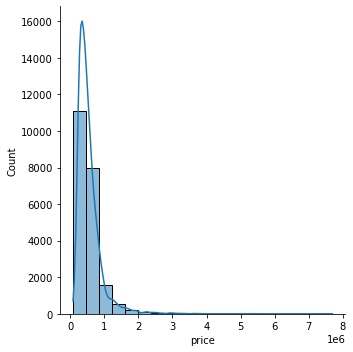

In [6]:
#Creating a distribution to data 
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
sns.displot(df.price, bins=20, kde=True);

#### Below  are key points from preliminary data investigation

###### Target: Using this data we aim to predict house prices in King County

###### Predictors availability: We can few variables with positive linearity which can be leverage in our model 

###### Types of Data: Both numerical and categorical data available

######  Distribution of data: mostly righty skewed 

###### No of observations: 21597 properties, 70 suburbs

###### Duplication of data: none identified 


## 1.2 Clean and Process Data 
During this stage, I have followed below steps to clean data, 

###### Detecting and dealing with missing values to sqft_basement

###### Column transformations 

##### Data type conversions (e.g., numeric data mistakenly encoded as strings)




In [7]:
#missing data is notice in sqft_basement column with 454 records without a value 

df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1481.0        1
276.0         1
556.0         1
3500.0        1
225.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [8]:
# added a zero to missing values idenfied

df['sqft_basement'] = df['sqft_basement'].replace("\?", 0, regex=True)
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [9]:
 #Significant amount of Nan values appearing in the dataset and I wanted to undertand the total count & impacted 
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [10]:
#checking values for waterfront coloumn 

df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [11]:
#based on the data it looks like majority of the properties doesn't have waterfront view or year renovated. I included 0 "no view" or "no waterfront"

df['waterfront'].fillna(0, inplace=True)
df['view'].fillna(0, inplace=True)
df['yr_renovated'].fillna(0, inplace=True)

In [12]:
#Checking for Nan values and zero present after transformation 
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

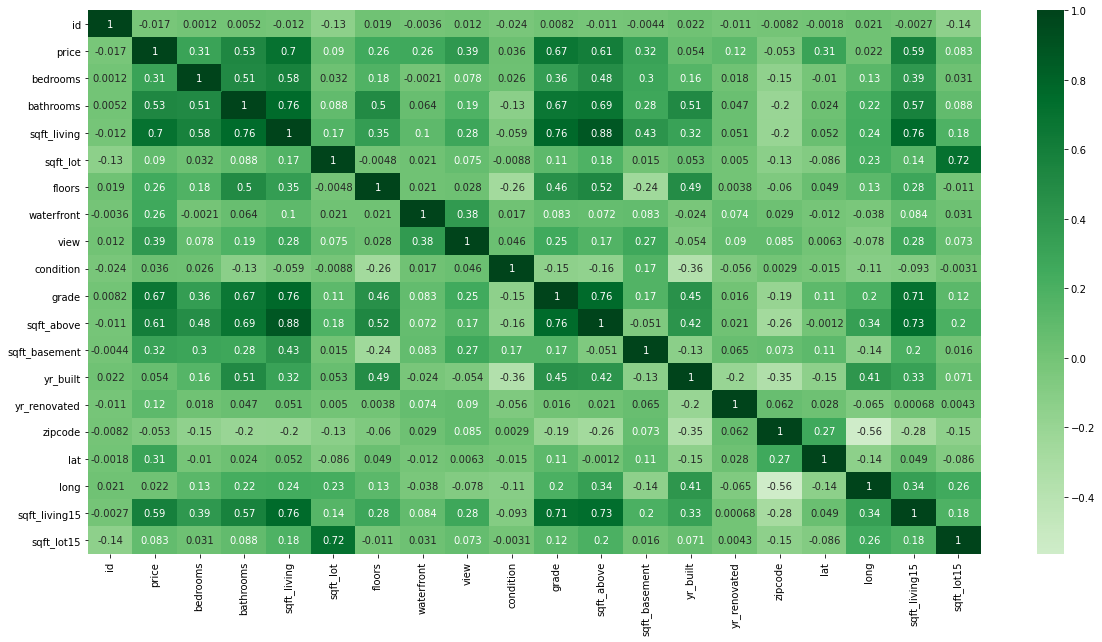

In [13]:
#checking for varirable correlations using heat map

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, center=0, cmap='Greens');

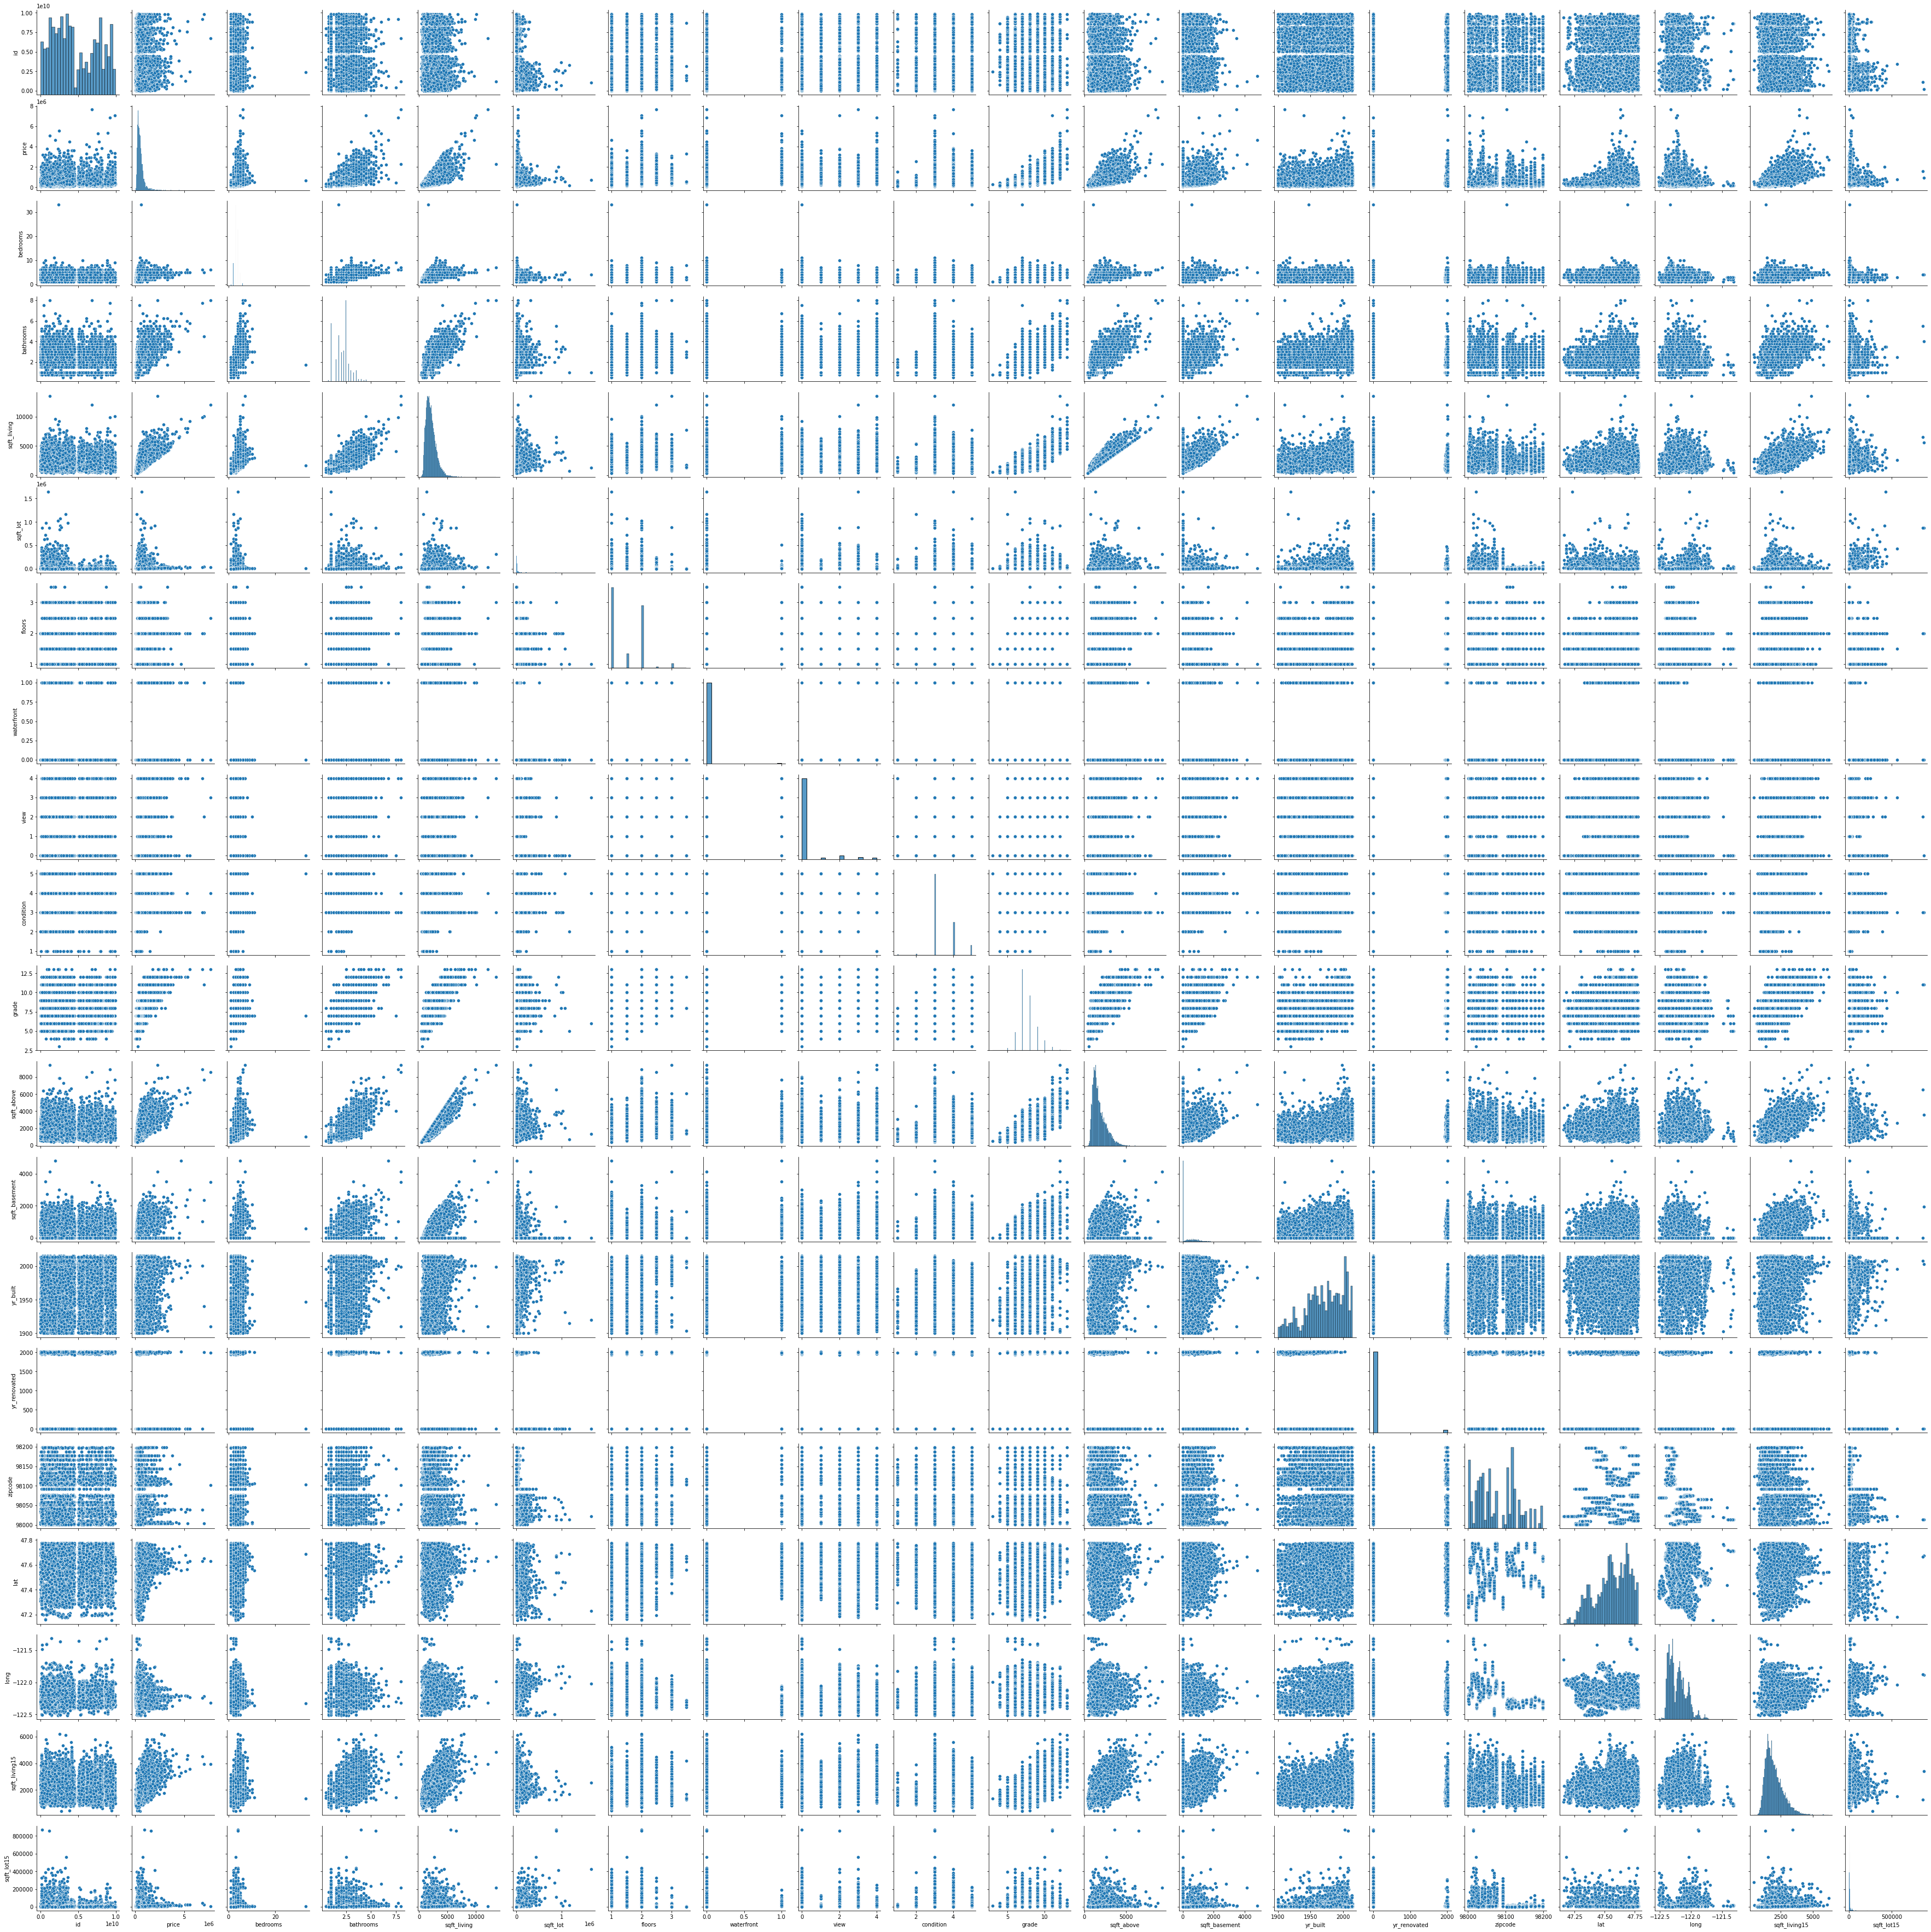

In [35]:
#More infromation on varirable spread and lineraity 
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data=df,palette='viridis')
plt.rcParams['font.size']=14
plt.rcParams['lines.linewidth']=2
plt.rcParams['font.serif']='Time New Roman'
plt.rcParams['legend.fontsize']=11
plt.show()

Based on Correlation it looks like "Bathrooms",  "sqft_living" , "grade", ' sqft_above', 'sqft_living15', 'sqft_lot15' are strongly correlated vs other variables. 

In [14]:
# I have changed yr_built to BuildYear to make to more meaningful 
# renaming the buildyear column name
df.rename(columns={'yr_built':'BuiltYear'}, inplace=True)
df.rename(columns={'lat':'Latitude'}, inplace=True)
df.rename(columns={'long':'Longitude'}, inplace=True)

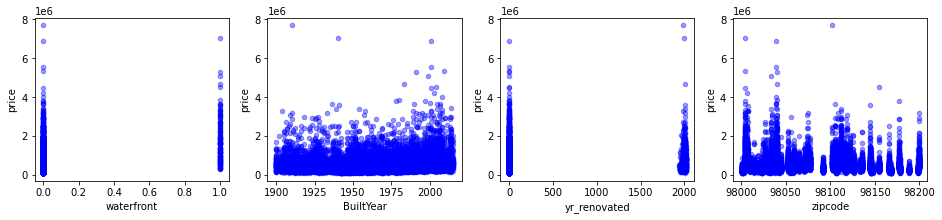

In [15]:
#Checking for meaningful categorical data

import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['waterfront', 'BuiltYear', 'yr_renovated', 'zipcode'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
    
#Based on data it looks like there are very few waterfront properties for area
#Zipcode seems to meaningful so I decided to group transform it more meaningful categorical data later.


In [16]:
# Dropping irrelevant columns
df.drop([ 'id','date'], axis=1, inplace=True)

In [17]:
#New columns check
print(df.columns)


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'BuiltYear', 'yr_renovated', 'zipcode', 'Latitude',
       'Longitude', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [18]:
df.head(10)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   221900.0         3       1.00         1180      5650     1.0         0.0   
1   538000.0         3       2.25         2570      7242     2.0         0.0   
2   180000.0         2       1.00          770     10000     1.0         0.0   
3   604000.0         4       3.00         1960      5000     1.0         0.0   
4   510000.0         3       2.00         1680      8080     1.0         0.0   
5  1230000.0         4       4.50         5420    101930     1.0         0.0   
6   257500.0         3       2.25         1715      6819     2.0         0.0   
7   291850.0         3       1.50         1060      9711     1.0         0.0   
8   229500.0         3       1.00         1780      7470     1.0         0.0   
9   323000.0         3       2.50         1890      6560     2.0         0.0   

   view  condition  grade  sqft_above  sqft_basement  BuiltYear  yr_renovated  \
0   0.0          3      7        1180            0.0       1955           0.0   
1   0.0          3      7        2170          400.0       1951        1991.0   
2   0.0          3      6         770            0.0       1933           0.0   
3   0.0          5      7        1050          910.0       1965           0.0   
4   0.0          3      8        1680            0.0       1987           0.0   
5   0.0          3     11        3890         1530.0       2001           0.0   
6   0.0          3      7        1715            0.0       1995           0.0   
7   0.0          3      7        1060            0.0       1963           0.0   
8   0.0          3      7        1050          730.0       1960           0.0   
9   0.0          3      7        1890            0.0       2003           0.0   

   zipcode  Latitude  Longitude  sqft_living15  sqft_lot15  
0    98178   47.5112   -122.257           1340        5650  
1    98125   47.7210   -122.319           1690        7639  
2    98028   47.7379   -122.233           2720        8062  
3    98136   47.5208   -122.393           1360        5000  
4    98074   47.6168   -122.045           1800        7503  
5    98053   47.6561   -122.005           4760      101930  
6    98003   47.3097   -122.327           2238        6819  
7    98198   47.4095   -122.315           1650        9711  
8    98146   47.5123   -122.337           1780        8113  
9    98038   47.3684   -122.031           2390        7570

In [19]:
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.373200      2.115826   2080.321850  1.509941e+04   
std    3.673681e+05      0.926299      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       1.494096      0.006760      0.233181      3.409825      7.657915   
std        0.539683      0.081944      0.764673      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement     BuiltYear  yr_renovated       zipcode  \
count  21597.000000   21597.000000  21597.000000  21597.000000  21597.000000   
mean    1788.596842     285.716581   1970.999676     68.758207  98077.951845   
std      827.759761     439.819830     29.375234    364.037499     53.513072   
min      370.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     550.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

           Latitude     Longitude  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [20]:
#Getting rid of outliers  
#For any house with more than 8 bedrooms and sqft_living >10,000 as a luxury property or Hotel and normal price predictions will not apply. 
filtered_df = df[(df['bedrooms'] <= 8) & (df['sqft_living'] <= 10000)]
filtered_df .info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21583 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21583 non-null  float64
 1   bedrooms       21583 non-null  int64  
 2   bathrooms      21583 non-null  float64
 3   sqft_living    21583 non-null  int64  
 4   sqft_lot       21583 non-null  int64  
 5   floors         21583 non-null  float64
 6   waterfront     21583 non-null  float64
 7   view           21583 non-null  float64
 8   condition      21583 non-null  int64  
 9   grade          21583 non-null  int64  
 10  sqft_above     21583 non-null  int64  
 11  sqft_basement  21583 non-null  float64
 12  BuiltYear      21583 non-null  int64  
 13  yr_renovated   21583 non-null  float64
 14  zipcode        21583 non-null  int64  
 15  Latitude       21583 non-null  float64
 16  Longitude      21583 non-null  float64
 17  sqft_living15  21583 non-null  int64  
 18  sqft_l

## 2.0  Baseline Model  

Now that I have completed the exploratory data analysis (EDA) and obtained insights, I will create a baseline model. This initial model will utilize all available data without any preprocessing or transformations. Its purpose is to serve as a reference point for comparison with future iterations of the model, allowing me to assess the impact of various transformations and enhancements.

In [21]:
#I have split my varirables to numerical and categorical variables 
numerical_variables = filtered_df[['Latitude', 'Longitude', 'sqft_living15', 'sqft_lot15', 'price', 'sqft_basement', 'sqft_living', 'sqft_lot', 'sqft_above']]
numerical_variables.head(10)


Latitude  Longitude  sqft_living15  sqft_lot15      price  sqft_basement  \
0   47.5112   -122.257           1340        5650   221900.0            0.0   
1   47.7210   -122.319           1690        7639   538000.0          400.0   
2   47.7379   -122.233           2720        8062   180000.0            0.0   
3   47.5208   -122.393           1360        5000   604000.0          910.0   
4   47.6168   -122.045           1800        7503   510000.0            0.0   
5   47.6561   -122.005           4760      101930  1230000.0         1530.0   
6   47.3097   -122.327           2238        6819   257500.0            0.0   
7   47.4095   -122.315           1650        9711   291850.0            0.0   
8   47.5123   -122.337           1780        8113   229500.0          730.0   
9   47.3684   -122.031           2390        7570   323000.0            0.0   

   sqft_living  sqft_lot  sqft_above  
0         1180      5650        1180  
1         2570      7242        2170  
2          770     10000         770  
3         1960      5000        1050  
4         1680      8080        1680  
5         5420    101930        3890  
6         1715      6819        1715  
7         1060      9711        1060  
8         1780      7470        1050  
9         1890      6560        1890

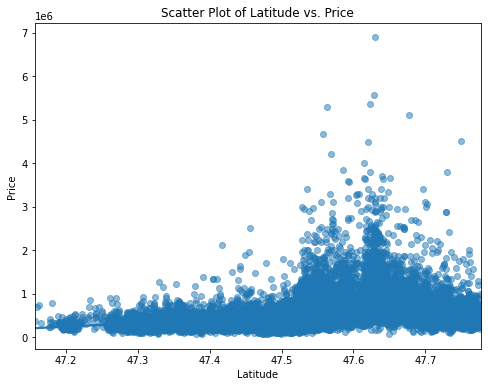

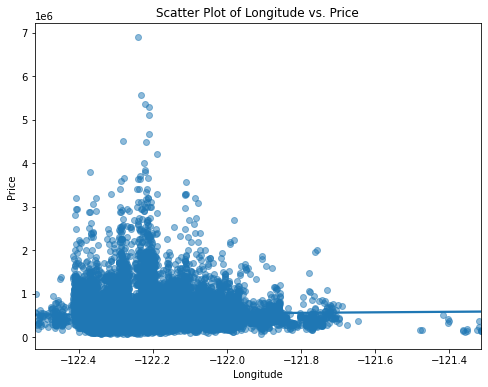

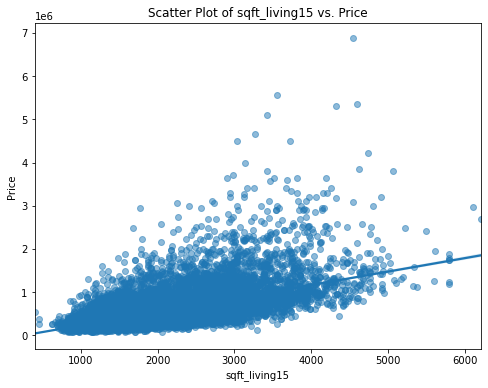

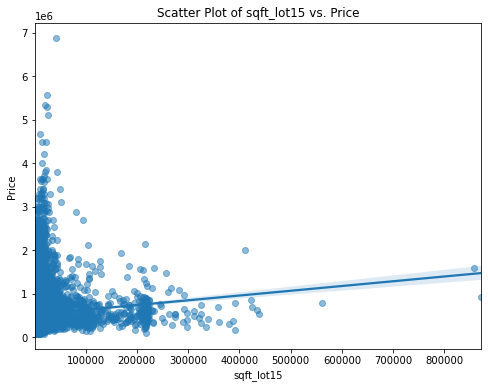

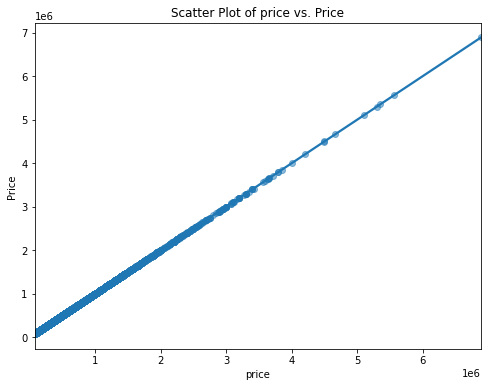

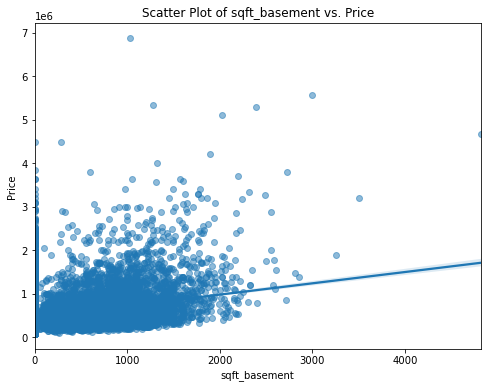

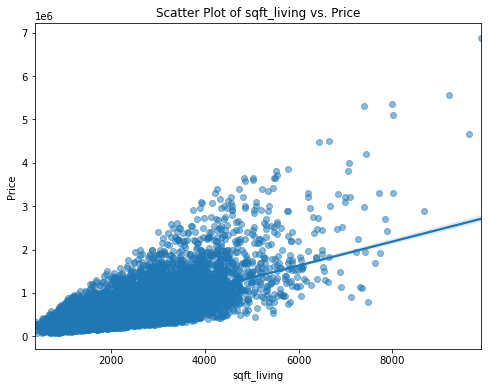

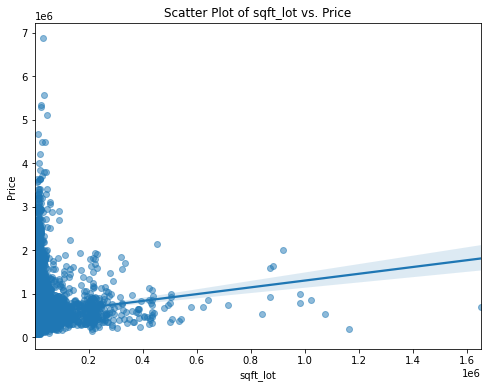

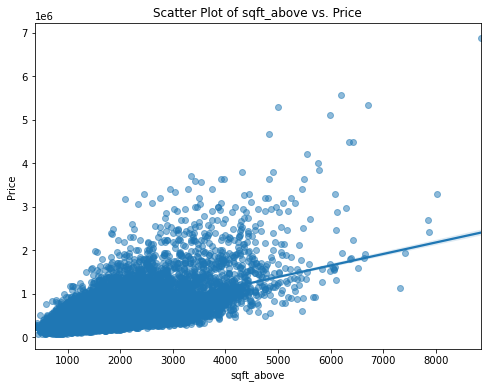

In [22]:
#creating regression line to check numeric variable 

import seaborn as sns
for variable in numerical_variables.columns:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=variable, y='price', data=filtered_df, scatter_kws={'alpha':0.5})
    plt.title(f'Scatter Plot of {variable} vs. Price')
    plt.xlabel(variable)
    plt.ylabel('Price')
    plt.show()


I wanted to include zipcode as a catogorical varirable as some suburbs tend to be highly sought after and contribute to price hikes. Before that I want to limit the values by transforming it to just three key values to avoid complexity. 

In [24]:
# Created a pivot to see mean house price per suburb
pivot_table = pd.pivot_table(df, values='price', index='zipcode', aggfunc='mean', fill_value=0)

# Add a mean column to the pivot table
pivot_table['mean'] = pivot_table.mean(axis=1)

# Reset the index to include 'zipcode' as a column
pivot_table = pivot_table.reset_index()

# Sort the pivot table by the 'mean' column in descending order
pivot_table = pivot_table.sort_values(by='mean', ascending=False).head(70)

print(pivot_table)



    zipcode         price          mean
24    98039  2.161300e+06  2.161300e+06
3     98004  1.356524e+06  1.356524e+06
25    98040  1.194874e+06  1.194874e+06
48    98112  1.096239e+06  1.096239e+06
41    98102  8.996077e+05  8.996077e+05
..      ...           ...           ...
61    98148  2.849086e+05  2.849086e+05
0     98001  2.811949e+05  2.811949e+05
20    98032  2.512962e+05  2.512962e+05
64    98168  2.403284e+05  2.403284e+05
1     98002  2.342840e+05  2.342840e+05

[70 rows x 3 columns]


In [25]:
# Convert the 'Suburb_Mean_House_Price' column to numeric
pivot_table['Suburb_Mean_House_Price'] = pd.to_numeric(pivot_table['mean'], errors='coerce')

# Define a function named Suburb_Price_Category
def Suburb_Price_Category(price):
    if price >= 884960:
        return "High"
    elif price >= 681000:
        return "Medium"
    else:
        return "Low"

# Apply the Suburb_Price_Category function to create the 'Suburb_Price_Category' column
pivot_table['Suburb_Price_Category'] = pivot_table['Suburb_Mean_House_Price'].apply(Suburb_Price_Category)

# Print the dataFrame with the new 'Suburb_Price_Category' column
print(pivot_table)


    zipcode         price          mean  Suburb_Mean_House_Price  \
24    98039  2.161300e+06  2.161300e+06             2.161300e+06   
3     98004  1.356524e+06  1.356524e+06             1.356524e+06   
25    98040  1.194874e+06  1.194874e+06             1.194874e+06   
48    98112  1.096239e+06  1.096239e+06             1.096239e+06   
41    98102  8.996077e+05  8.996077e+05             8.996077e+05   
..      ...           ...           ...                      ...   
61    98148  2.849086e+05  2.849086e+05             2.849086e+05   
0     98001  2.811949e+05  2.811949e+05             2.811949e+05   
20    98032  2.512962e+05  2.512962e+05             2.512962e+05   
64    98168  2.403284e+05  2.403284e+05             2.403284e+05   
1     98002  2.342840e+05  2.342840e+05             2.342840e+05   

   Suburb_Price_Category  
24                  High  
3                   High  
25                  High  
48                  High  
41                  High  
..                   

In [26]:
# Define a function to format the values as dollars for mean house price 
def format_as_dollars(value):
    return f'${value:,.2f}'

# Apply the formatting function to the 'Price' column
pivot_table['Suburb_Mean_House_Price'] = pivot_table['price'].apply(format_as_dollars)
# Print the DataFrame with formatted prices
print(pivot_table)

    zipcode         price          mean Suburb_Mean_House_Price  \
24    98039  2.161300e+06  2.161300e+06           $2,161,300.00   
3     98004  1.356524e+06  1.356524e+06           $1,356,523.99   
25    98040  1.194874e+06  1.194874e+06           $1,194,873.64   
48    98112  1.096239e+06  1.096239e+06           $1,096,239.01   
41    98102  8.996077e+05  8.996077e+05             $899,607.67   
..      ...           ...           ...                     ...   
61    98148  2.849086e+05  2.849086e+05             $284,908.60   
0     98001  2.811949e+05  2.811949e+05             $281,194.87   
20    98032  2.512962e+05  2.512962e+05             $251,296.24   
64    98168  2.403284e+05  2.403284e+05             $240,328.37   
1     98002  2.342840e+05  2.342840e+05             $234,284.04   

   Suburb_Price_Category  
24                  High  
3                   High  
25                  High  
48                  High  
41                  High  
..                   ...  
61    

In [27]:
pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 24 to 1
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   zipcode                  70 non-null     int64  
 1   price                    70 non-null     float64
 2   mean                     70 non-null     float64
 3   Suburb_Mean_House_Price  70 non-null     object 
 4   Suburb_Price_Category    70 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 3.3+ KB


In [28]:
pivot_table.describe().transpose()

count           mean            std            min            25%  \
zipcode   70.0   98077.300000      56.622408   98001.000000   98029.250000   
price     70.0  561010.926979  302394.017074  234284.035176  354133.935076   
mean      70.0  561010.926979  302394.017074  234284.035176  354133.935076   

                   50%            75%        max  
zipcode   98067.500000   98117.750000    98199.0  
price    492001.208761  645532.226232  2161300.0  
mean     492001.208761  645532.226232  2161300.0

In [29]:
#Merging two data sets
filtered_dfv1 = filtered_df.merge(
    pivot_table[['zipcode', 'Suburb_Price_Category', 'Suburb_Mean_House_Price']],
    on='zipcode',
    how='left'
)

# Display the merged DataFrame
print(filtered_dfv1.head(10))


       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   221900.0         3       1.00         1180      5650     1.0         0.0   
1   538000.0         3       2.25         2570      7242     2.0         0.0   
2   180000.0         2       1.00          770     10000     1.0         0.0   
3   604000.0         4       3.00         1960      5000     1.0         0.0   
4   510000.0         3       2.00         1680      8080     1.0         0.0   
5  1230000.0         4       4.50         5420    101930     1.0         0.0   
6   257500.0         3       2.25         1715      6819     2.0         0.0   
7   291850.0         3       1.50         1060      9711     1.0         0.0   
8   229500.0         3       1.00         1780      7470     1.0         0.0   
9   323000.0         3       2.50         1890      6560     2.0         0.0   

   view  condition  grade  ...  sqft_basement  BuiltYear  yr_renovated  \
0   0.0          3      7  ...            0.0

In [30]:
#Below are my catagorical varirables 
categorical_variables = filtered_dfv1[['bedrooms', 'bathrooms', 'floors', 'BuiltYear', 'yr_renovated', 'zipcode', 'waterfront', 'view', 'condition', 'grade','Suburb_Price_Category', 'Suburb_Mean_House_Price']]
categorical_variables.head(10)


bedrooms  bathrooms  floors  BuiltYear  yr_renovated  zipcode  waterfront  \
0         3       1.00     1.0       1955           0.0    98178         0.0   
1         3       2.25     2.0       1951        1991.0    98125         0.0   
2         2       1.00     1.0       1933           0.0    98028         0.0   
3         4       3.00     1.0       1965           0.0    98136         0.0   
4         3       2.00     1.0       1987           0.0    98074         0.0   
5         4       4.50     1.0       2001           0.0    98053         0.0   
6         3       2.25     2.0       1995           0.0    98003         0.0   
7         3       1.50     1.0       1963           0.0    98198         0.0   
8         3       1.00     1.0       1960           0.0    98146         0.0   
9         3       2.50     2.0       2003           0.0    98038         0.0   

   view  condition  grade Suburb_Price_Category Suburb_Mean_House_Price  
0   0.0          3      7                   Low             $310,612.76  
1   0.0          3      7                   Low             $469,928.77  
2   0.0          3      6                   Low             $462,488.87  
3   0.0          5      7                   Low             $551,768.52  
4   0.0          3      8                Medium             $685,675.84  
5   0.0          3     11                   Low             $677,215.03  
6   0.0          3      7                   Low             $294,111.28  
7   0.0          3      7                   Low             $302,896.74  
8   0.0          3      7                   Low             $359,496.26  
9   0.0          3      7                   Low             $367,091.48

In [137]:
import pandas as pd
import statsmodels.api as sm

# Define the numerical and categorical variable lists
numerical_variables = ['Latitude', 'Longitude', 'sqft_living15', 'sqft_lot15', 'price', 'sqft_basement', 'sqft_living', 'sqft_lot', 'sqft_above']
categorical_variables = ['bedrooms', 'bathrooms', 'floors', 'BuiltYear', 'yr_renovated', 'zipcode', 'waterfront', 'view', 'condition', 'grade', 'Suburb_Price_Category', 'Suburb_Mean_House_Price']

# Log transform and normalize the numerical variables from filtered_dfv1
df_cont = filtered_dfv1[numerical_variables]

# One-hot encode categorical variables
df_cat = pd.get_dummies(filtered_dfv1[categorical_variables], drop_first=True)

# Concatenate the numerical and one-hot encoded categorical variables
df_baseline = pd.concat([df_cont, df_cat], axis=1)

X = df_baseline.drop('price', axis=1)
y = df_baseline['price']

X_int = sm.add_constant(X)
model = sm.OLS(y, X_int).fit()
model_summary = model.summary()

# Display the model summary
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     1086.
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:51:48   Log-Likelihood:            -2.8874e+05
No. Observations:               21583   AIC:                         5.777e+05
Df Residuals:                   21496   BIC:                         5.783e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

## BaseLine Model Interpretation 

Based on OLS summary key findings were as follows, 

1. The R-squared value of 0.850 indicates that approximately 85% of the variance in the dependent variable 'price' is explained by the independent variables in the model. 

2. Adjusted R-squared: The adjusted R-squared value of 0.812 takes into account the number of independent variables in the model. It is slightly lower than the R-squared value, suggesting that the addition of some independent variables may not significantly improve the model's explanatory power. This could indicate potential overfitting if the number of features is high.

3. F-statistic: The F-statistic of 378.7 is associated with a probability of 0.00, indicating that at least one independent variable in the model is statistically significant. The F-statistic is used to test the overall significance of the model, and a low p-value suggests that the model as a whole is significant.


4. Covariance Type: The covariance type is specified as "nonrobust." This suggests that the model does not account for heteroscedasticity (unequal variance across observations) and assumes that the error terms have constant variance. 

##### Summary: The construction of the baseline model appears to exhibit overfitting tendencies and the possibility of multicollinearity issues. It is essential to thoroughly validate all underlying assumptions in the next iteration of the model to enhance its reliability and predictive performance.

## 3.0 Iteration 1 - Checking for Assumptions 
### Linearity 
I have selectively chosen variables that demonstrate a positive linear relationship with price.


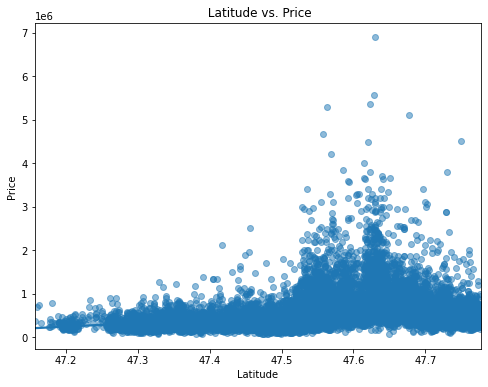

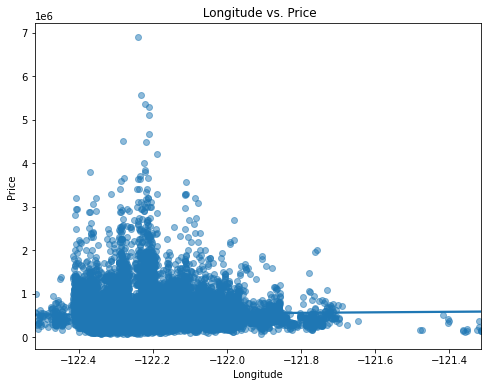

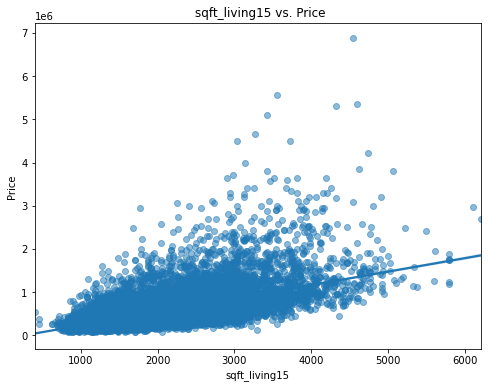

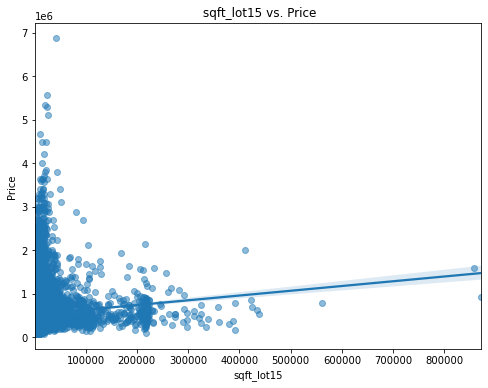

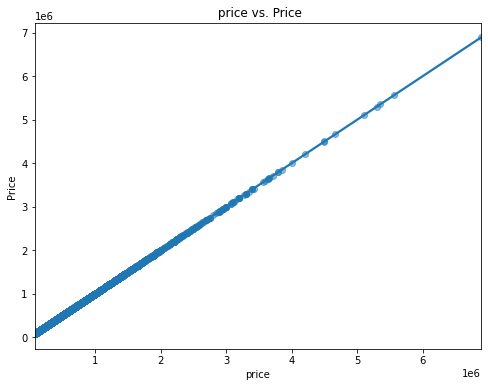

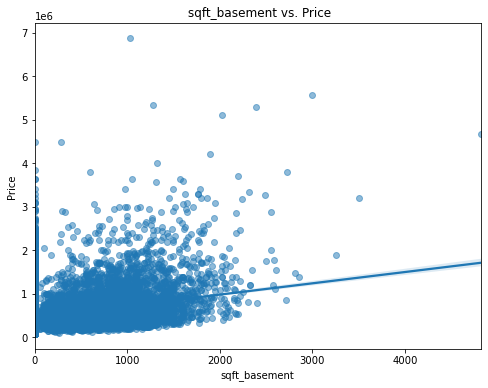

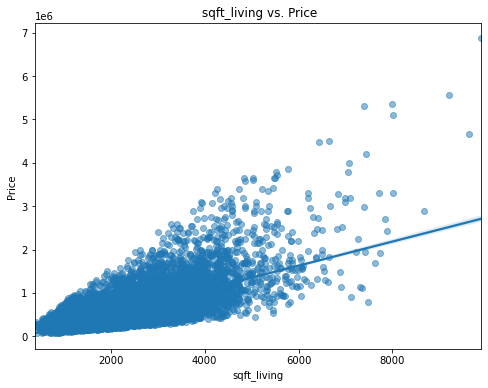

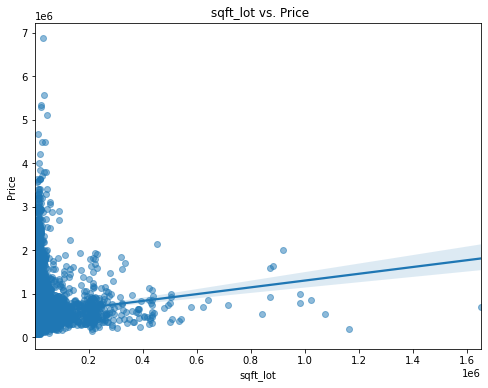

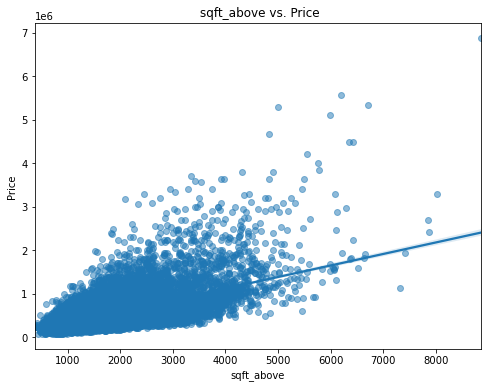

In [31]:
#checking for the linearity of the numeric variable 
import matplotlib.pyplot as plt
import seaborn as sns

# Created scatter plots with regression lines for each numerical variable vs. 'price'
for variable in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=variable, y='price', data=filtered_dfv1, scatter_kws={'alpha': 0.5})
    plt.title(f' {variable} vs. Price')
    plt.xlabel(variable)
    plt.ylabel('Price')
    plt.show()


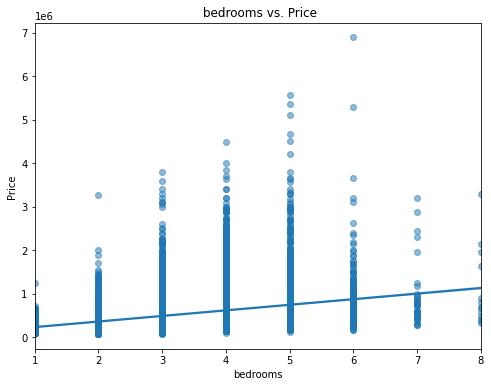

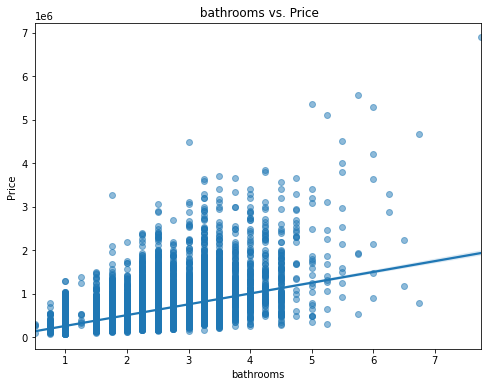

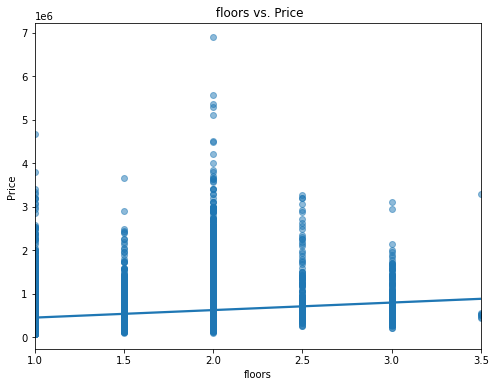

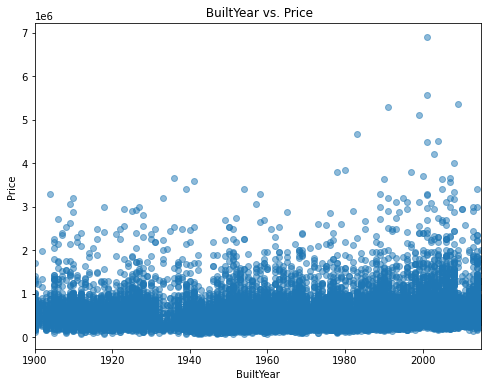

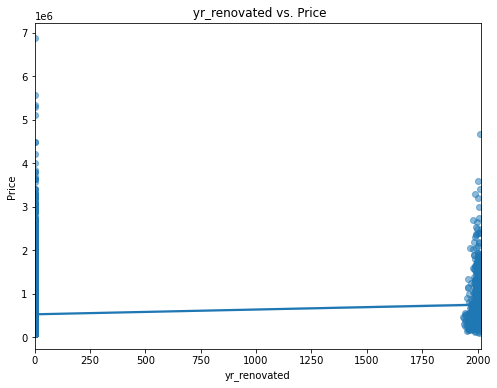

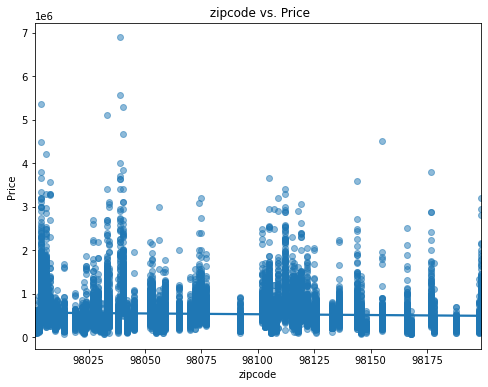

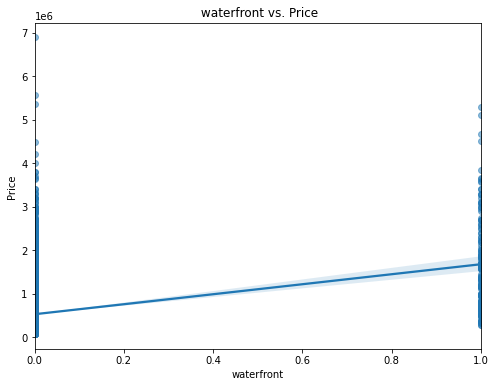

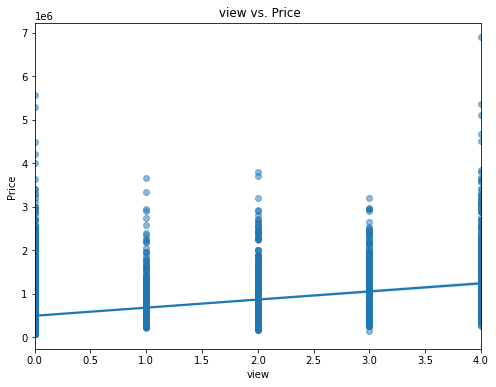

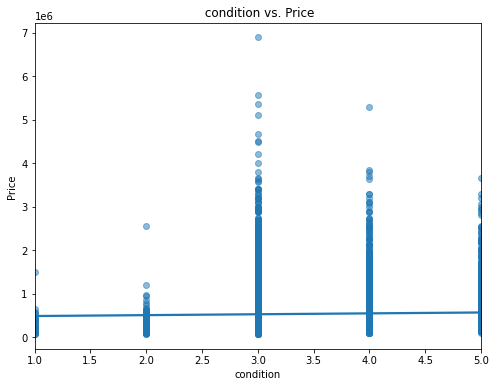

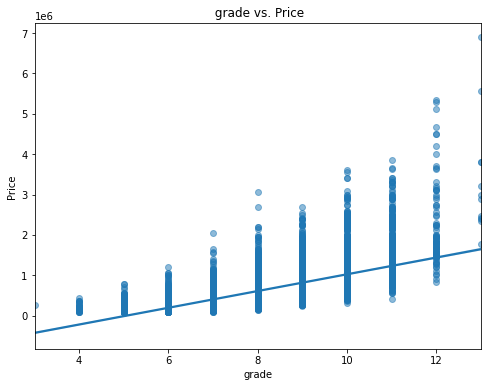

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

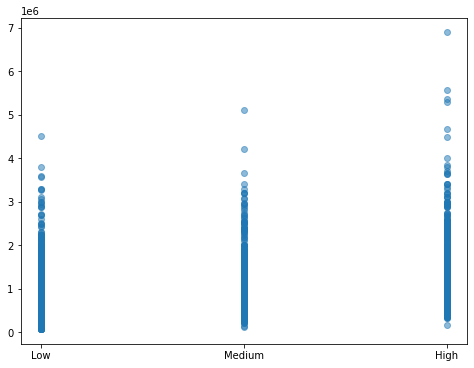

In [32]:
#checking for the linearity of the catagorical variable 
for variable in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=variable, y='price', data=filtered_dfv1, scatter_kws={'alpha': 0.5})
    plt.title(f' {variable} vs. Price')
    plt.xlabel(variable)
    plt.ylabel('Price')
    plt.show()



#### Summary of lineraity 

###### Numerical Variable:
Srong relationship : sqft_living , sqft_above , sqft_living15 , sqft_basement


Weak  relationship: Latitude , Longitude ,sqft_lot15 ,sqft_basement ,sqft_lot





<Figure size 576x432 with 0 Axes>

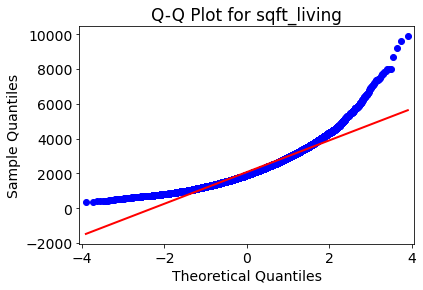

<Figure size 576x432 with 0 Axes>

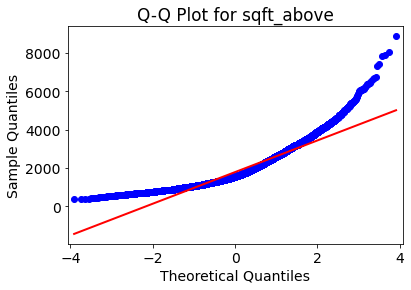

<Figure size 576x432 with 0 Axes>

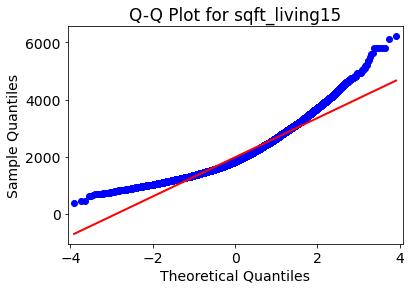

<Figure size 576x432 with 0 Axes>

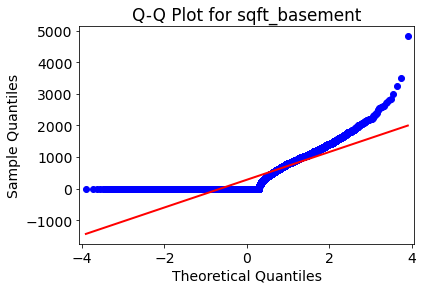

In [224]:
#creating Q-Q plots to check probability 

import statsmodels.api as sm
import matplotlib.pyplot as plt

# Select the variables you want to create Q-Q plots for
variables = ['sqft_living', 'sqft_above', 'sqft_living15', 'sqft_basement']

# Loop through the selected variables and create Q-Q plots
for variable in variables:
    plt.figure(figsize=(8, 6))
    sm.qqplot(filtered_dfv1[variable], line='s')
    plt.title(f'Q-Q Plot for {variable}')
    plt.show()


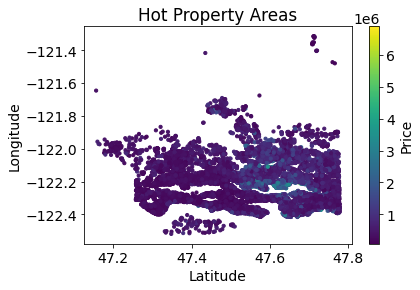

In [148]:
#Further this scattergraph shows longitudebelow -122.0 and latitude 47.5 tend to be hot property area. 

import matplotlib.pyplot as plt

# Extract latitudes, longitudes, and prices from your DataFrame
latitudes = filtered_dfv1['Latitude']
longitudes = filtered_dfv1['Longitude']
prices = filtered_dfv1['price']


# Create a scatter plot with prices as colors
plt.scatter(latitudes, longitudes, c=prices, cmap='viridis', s=10)  # Adjust 's' for marker size

# Add colorbar to show the price scale
plt.colorbar(label='Price')

plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Hot Property Areas")

plt.show()


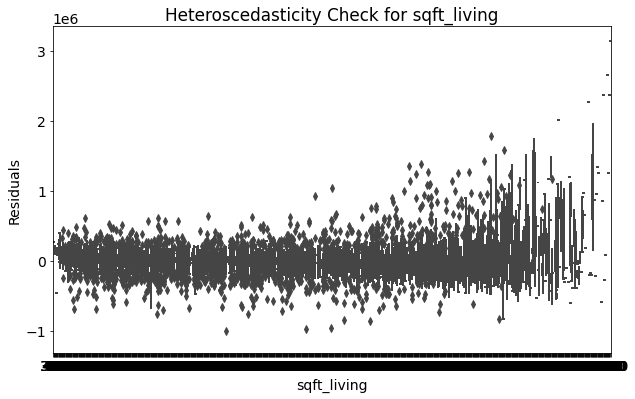

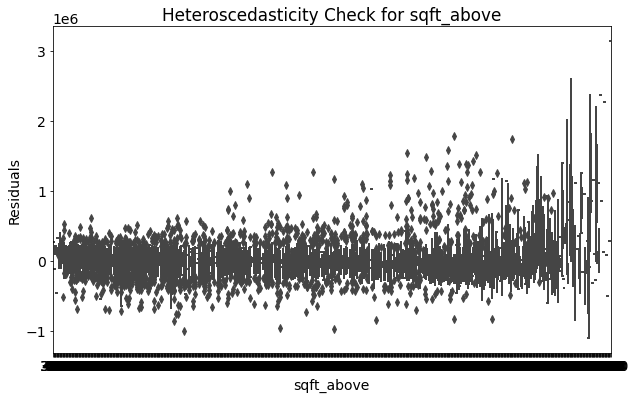

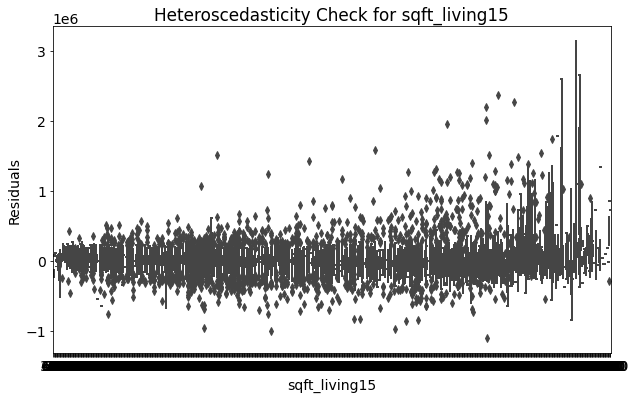

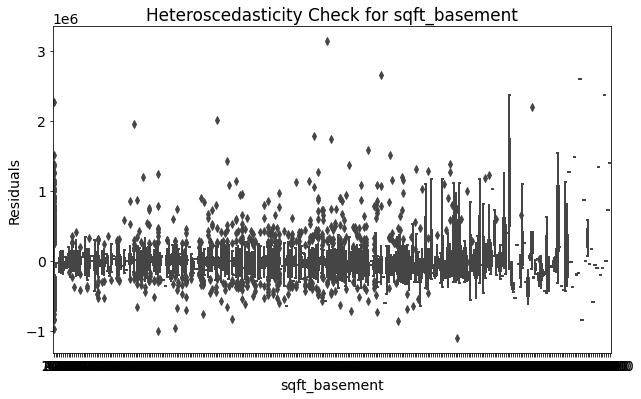

In [164]:
#Checking Heteroscedasticity

import matplotlib.pyplot as plt
import seaborn as sns

#categorical variables
variables = ['sqft_living', 'sqft_above', 'sqft_living15', 'sqft_basement']
# Loop through each categorical variable
for cat_var in variables:
    plt.figure(figsize=(10, 6))

    sns.boxplot(x=cat_var, y=residuals, data=filtered_dfv1)
    
    plt.title(f'Heteroscedasticity Check for {cat_var}')
    plt.xlabel(cat_var)
    plt.ylabel('Residuals')
    
    plt.show()


## 3.1 Normality and homoscedasticity of categorical variables

As categorical data does not perform like numeric data I am checking dummy varirable results to undertand the relationship. 

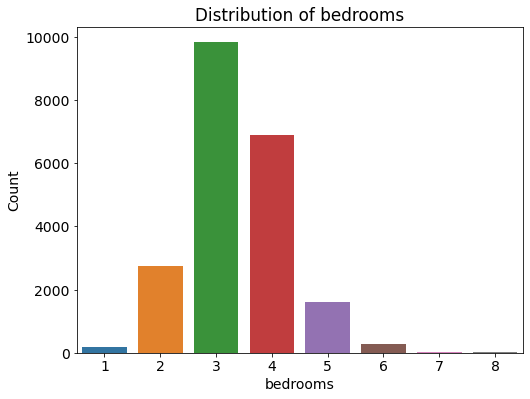

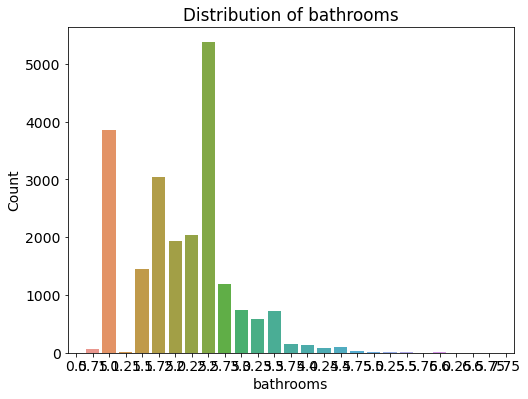

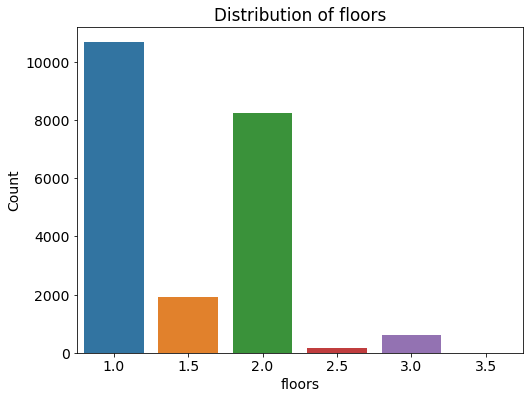

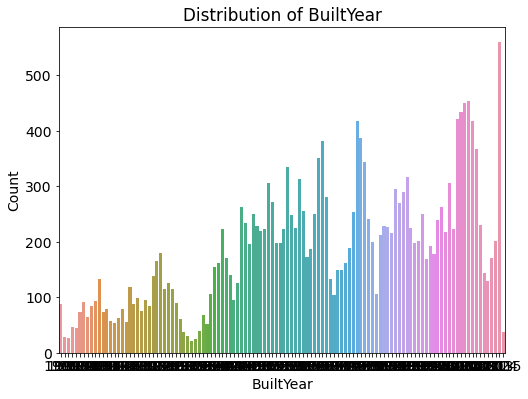

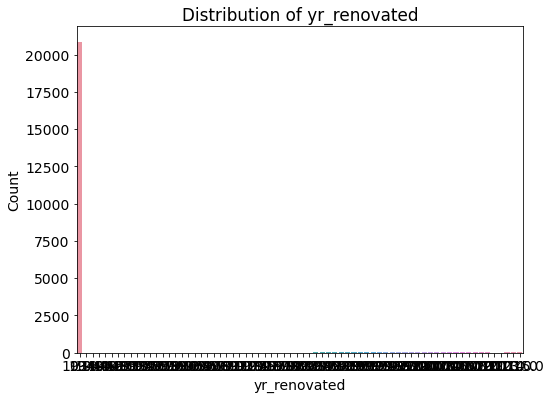

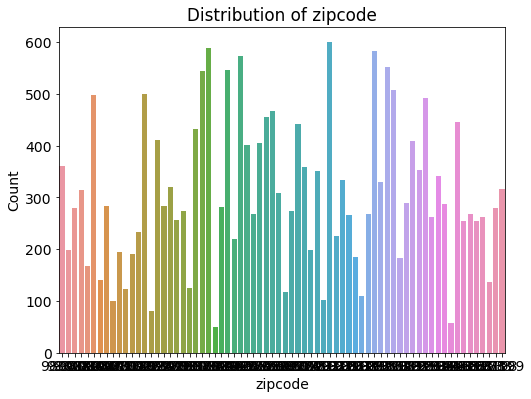

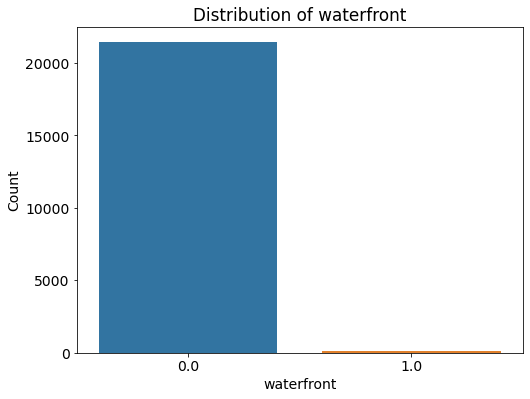

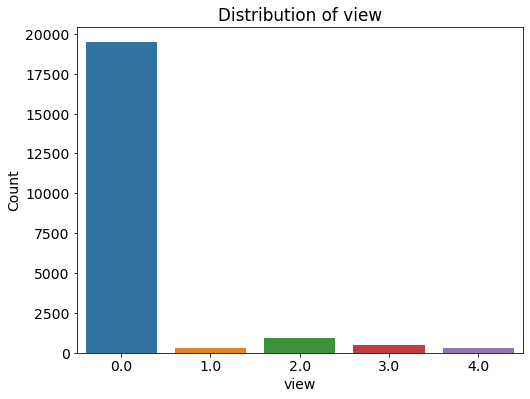

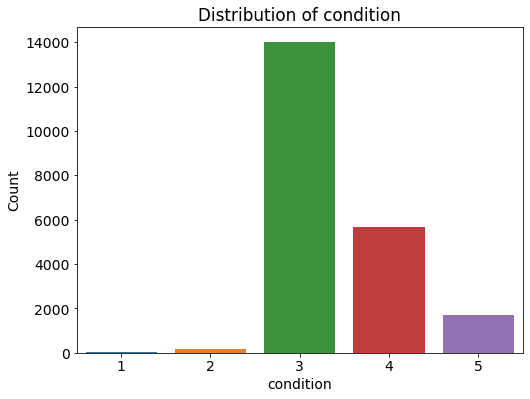

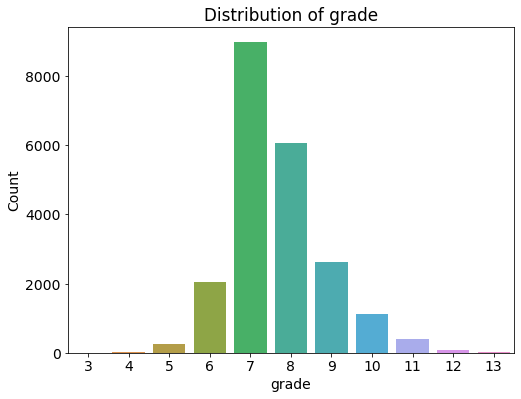

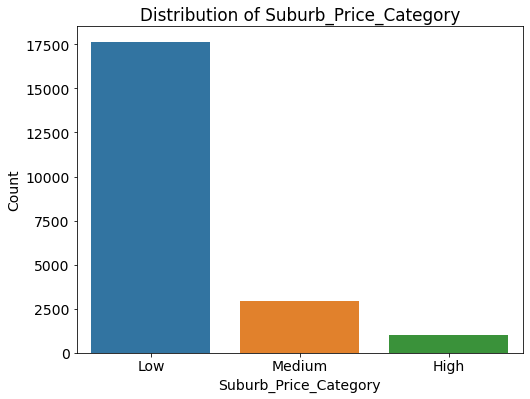

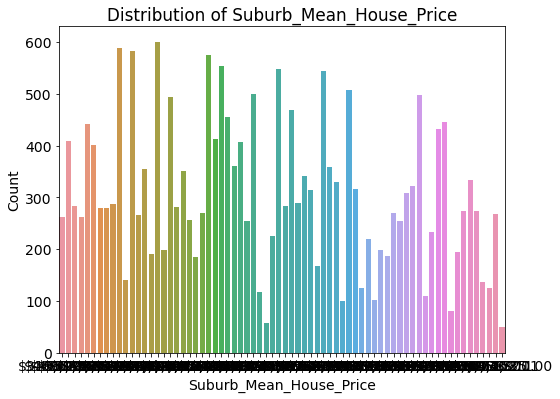

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical variables to check
categorical_variables = ['bedrooms', 'bathrooms', 'floors', 'BuiltYear', 'yr_renovated', 'zipcode', 'waterfront', 'view', 'condition', 'grade', 'Suburb_Price_Category', 'Suburb_Mean_House_Price']

# Loop through each categorical variable and create count plots
for variable in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=variable, data=filtered_dfv1)
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()


Catagorical Varirable "Bedroom" and "Grade" shows close relationship to normal distribution. Floors, Bathrooms and Condtion and "Sub_Price Category" shows skewed distribution

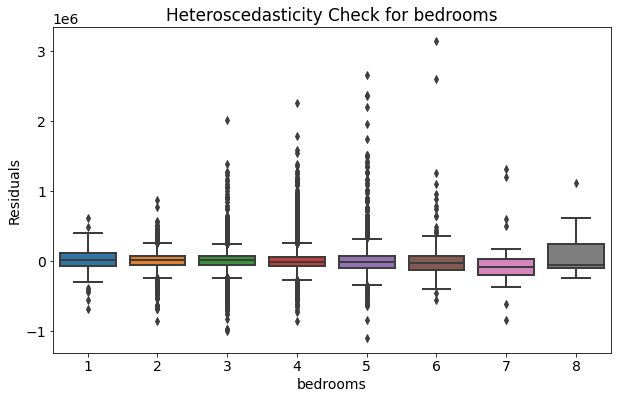

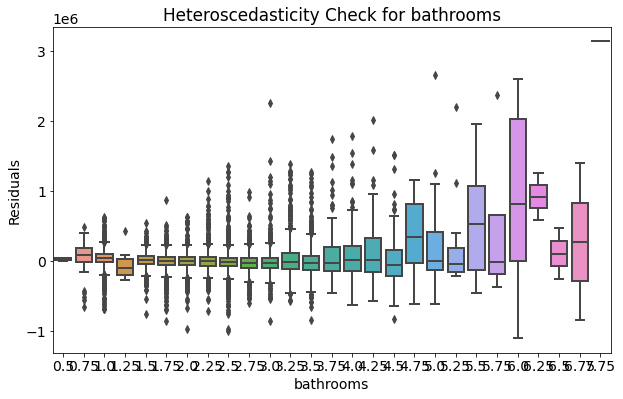

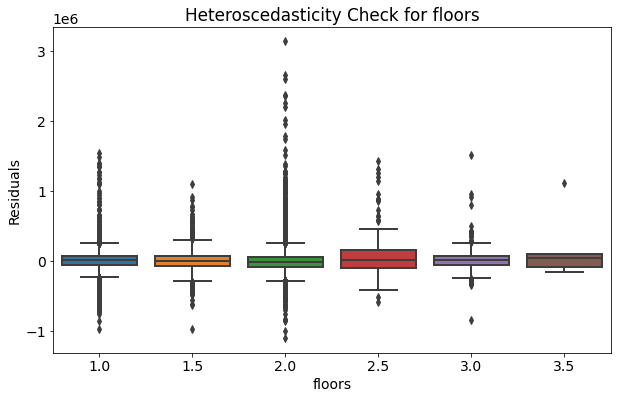

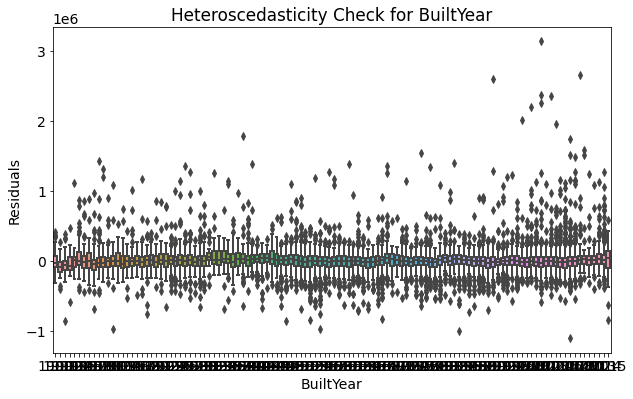

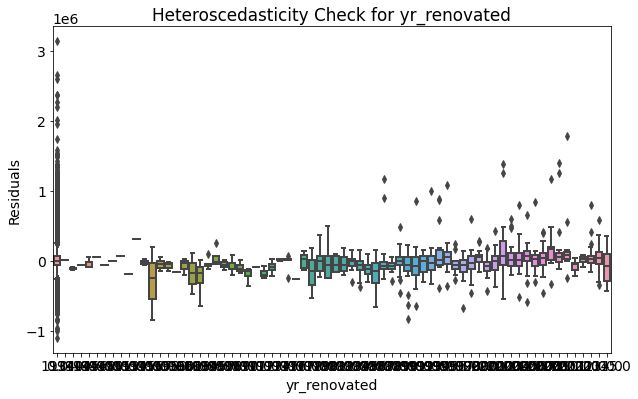

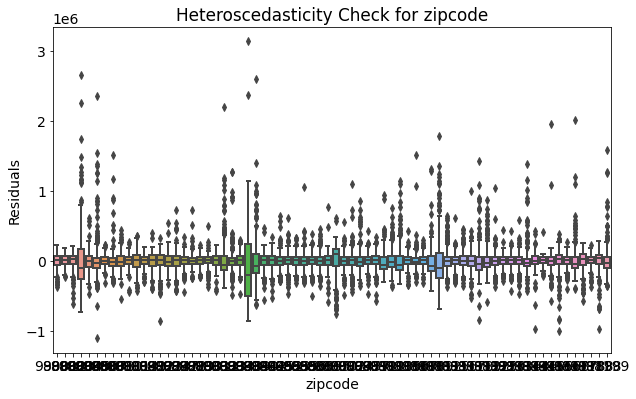

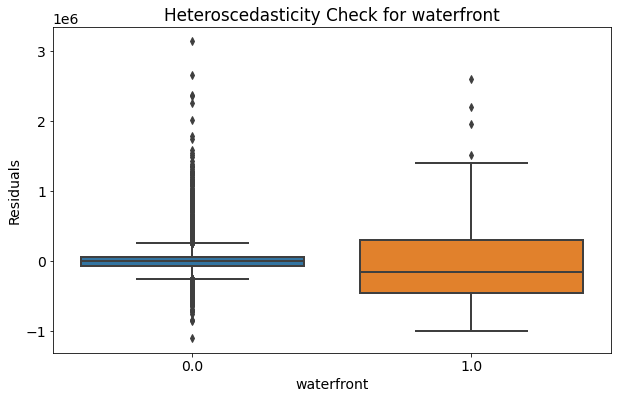

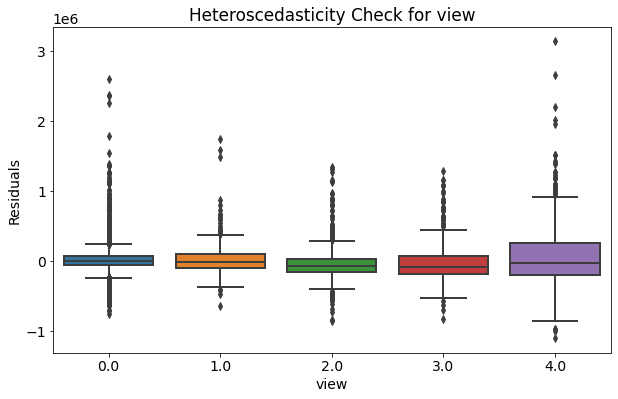

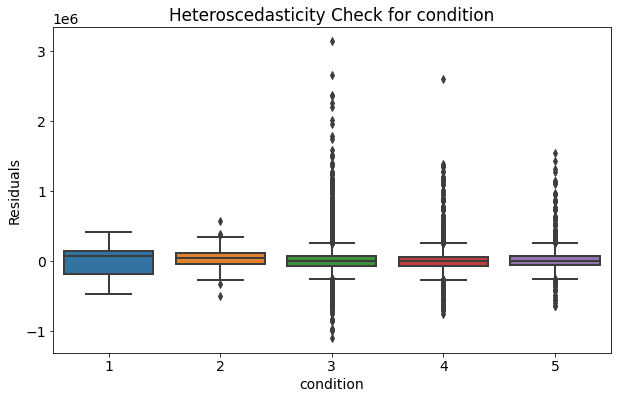

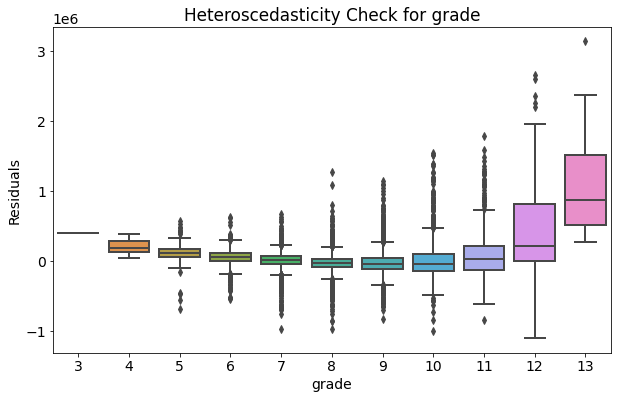

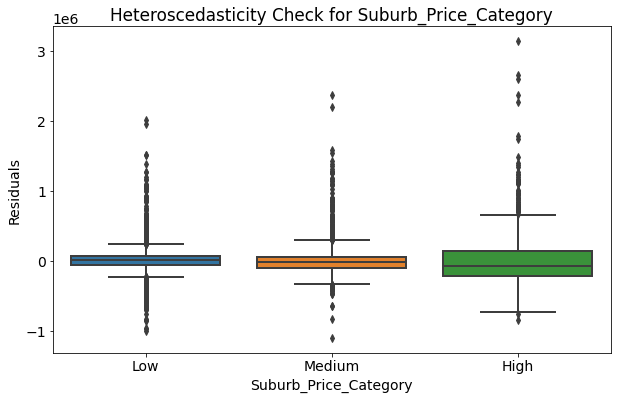

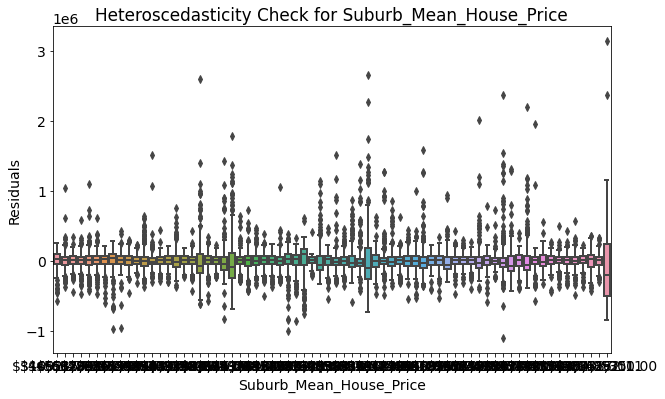

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

#categorical variables
categorical_variables = ['bedrooms', 'bathrooms', 'floors', 'BuiltYear', 'yr_renovated', 'zipcode', 'waterfront', 'view', 'condition', 'grade', 'Suburb_Price_Category', 'Suburb_Mean_House_Price']

# Loop through each categorical variable
for cat_var in categorical_variables:
    plt.figure(figsize=(10, 6))

    sns.boxplot(x=cat_var, y=residuals, data=filtered_dfv1)
    
    plt.title(f'Heteroscedasticity Check for {cat_var}')
    plt.xlabel(cat_var)
    plt.ylabel('Residuals')
    
    plt.show()



Based on Heteroscedasticity check "Bedroom", "Bathroom", "Sub_price Category"and "Grade" shows more homoscedasticity

## 3.2 Iteration 1 Model Comments

So far, the p-values suggest that all independent variables, except for sqft_basement, are statistically significant. This aligns with our expectations, as these selected features are likely to have an impact on the house's price. The adjusted R-squared value is promising, but there are numerous categorical variables that lack statistical significance, contributing to increased variance.

The skewness value of 3.274 indicates that the model is positively skewed, and the kurtosis value of 43.339 suggests a leptokurtic curve, implying heavy-tailed data with many outliers.

The goal is to pinpoint which independent variables have the most substantial influence on the target variable. Regarding linearity, numerical variables such as sqft_living, sqft_above, sqft_living15, and sqft_basement exhibited the strongest relationships. Among the categorical variables, grade, bathrooms, suburb price category, and bedroom demonstrated the strongest relationships. These selected variables also exhibit adequate homoscedasticity in the data distribution. Consequently, in the second iteration, I will focus exclusively on these variables.


## 4.0 Iteration 2



### Remove multicollinearity
To make the model work better and provide accurate results, removing variables that are very similar to each other is important.


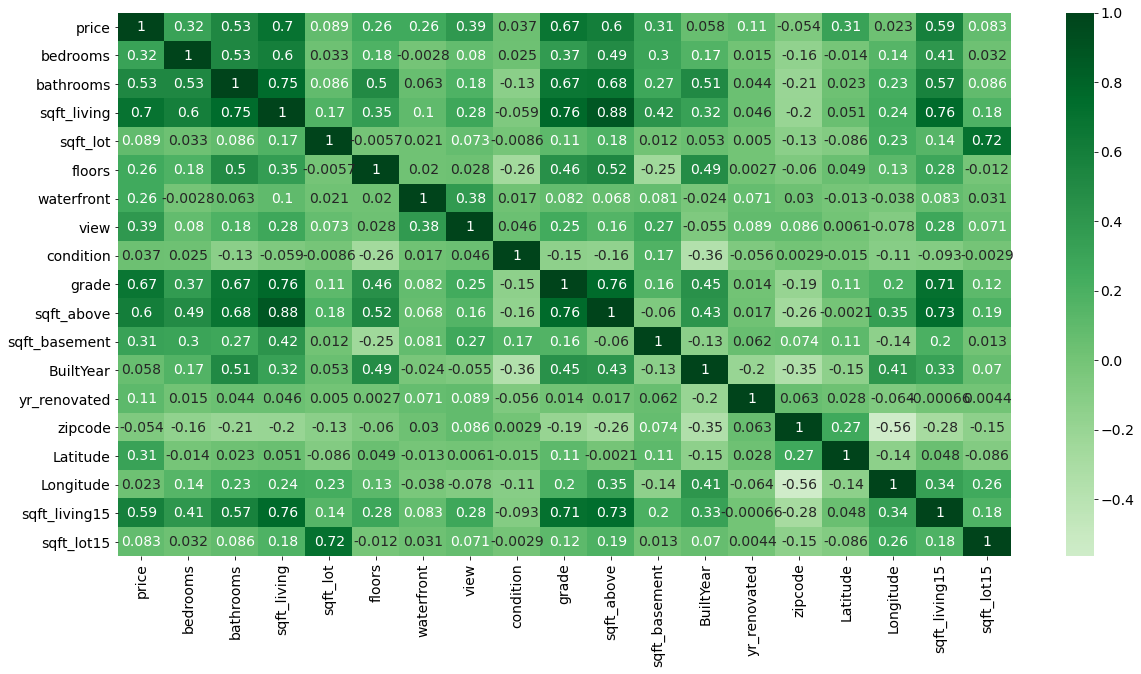

In [226]:
#heatmap
plt.figure(figsize=(20,10))
sns.heatmap(filtered_dfv1.corr(), annot=True, center=0, cmap='Greens');

At first glance, it appears that the size of the living area (sqft_living) might be connected or related to the size of the basement (sqft_basement) in a real-world context.


Based on correlation heatmap below we can see below variables tend to be correlated. 

###### sqft_lot15  vs sqft_lot 0.72

###### sqft_living15 vs sqft_living 0.76 

###### sqft_above vs sqft_living 0.88

To avoid having redundant information in our model and to ensure accurate results, I'll eliminate the variables sqft_lot15 and sqft_above. Even though sqft_above shows a strong connection with the house price, I believe that sqft_living and sqft_living15 are more influential factors. In general, larger living spaces tend to drive up the house price, and when neighboring houses also have spacious living areas, it tends to push the overall area's house prices higher.


### 4.1 Log Transformation & Encoding and 2nd Iteration 


In [186]:
numeric_variables1= ['sqft_living', 'sqft_living15','price']

# Log transform and normalize
df1_cont = filtered_dfv1[numeric_variables1]

# log features
log_names = [f'{column}_log' for column in df1_cont.columns]

df1_log = np.log(df1_cont)
df1_log.columns = log_names

# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df1_log_norm = df1_log.apply(normalize)

In [187]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Define the numerical and categorical variable lists
numeric_variables1 = ['sqft_living', 'sqft_living15', 'price']
categoricalsv1 = ['grade', 'bathrooms', 'Suburb_Price_Category', 'bedrooms']

# Log transform and normalize the numerical variables from filtered_dfv1
df_cont = filtered_dfv1[numeric_variables1]

# One-hot encode categorical variables
df_cat = pd.get_dummies(filtered_dfv1[categoricalsv1], drop_first=True)

# Concatenate the numerical and one-hot encoded categorical variables
df_baseline = pd.concat([df_cont, df_cat], axis=1)

X = df_baseline.drop('price', axis=1)
y = df_baseline['price']

# Split the data into training and testing sets (60% training, 40% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_train_int = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_int).fit()
model_summary = model.summary()

# Display the model summary
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     3418.
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:13:40   Log-Likelihood:            -1.7721e+05
No. Observations:               12949   AIC:                         3.544e+05
Df Residuals:                   12941   BIC:                         3.545e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### 4.2 Model Evaluation 
1.  R-squared is 0.649, which means that approximately 64.9% of the variance in house prices is explained by the model. A higher R-squared value indicates a better fit, but it should be considered alongside other metrics.

2. Adj. R² of 0.649 suggests that the model's predictors collectively provide a reasonably good fit to the data.

3. The F-statistic is 3418, and Prob (F-statistic) is very close to 0. This indicates that the model as a whole is statistically significant.

4. p-values (P>|t|): It appears that all predictors have p-values close to 0, indicating their significance.

5. Omnibus, Durbin-Watson, Jarque-Bera, Skew, and Kurtosis: These statistics provide information about the normality and distribution of residuals. A low Durbin-Watson value suggests possible autocorrelation, and significant values in Omnibus and Jarque-Bera tests may indicate that the residuals are not normally distributed.

### 4.3 Base Model and Iteration 2 Comparison 

#### Metric/Characteristic	Model A (Iteration 2)       vs    	Model B (Base Model)

R-squared               	0.649        vs              	0.813

Adj. R-squared           	0.649	     vs              0.812

F-statistic	                3418.0	     vs              1086.0

Number of Observations	    12,949	      vs              21,583

Number of Predictors	    7	           vs              86


 The decrease in model performance can be attributed to the removal of the variable "sqft_above." While "sqft_above" exhibited a strong correlation with the target variable (price), it also had a significant correlation with "sqft_living." The decision to exclude "sqft_above" was made to address multicollinearity issues, which can lead to instability in coefficient estimates. By omitting "sqft_above" due to its multicollinearity with "sqft_living," the Iteration 2 model provides a more robust and dependable representation of the dataset.






# 5 Iteration 3 
#### Checking for validity of assumptions

In [192]:
#checking log transformations 
import numpy as np

numeric_variables1 = ['sqft_living', 'sqft_living15', 'price']

# Log transform and normalize
df1_cont = filtered_dfv1[numeric_variables1]

# Log features
log_names = [f'{column}_log' for column in df1_cont.columns]

df1_log = np.log(df1_cont)
df1_log.columns = log_names

# Create 'price_log' column
df1_log['price_log'] = np.log(df1_cont['price'])  # Add this line

# Normalize (subtract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df1_log_norm = df1_log.apply(normalize)


I have checked results from log transformation whether it follows rules of normal distribution.

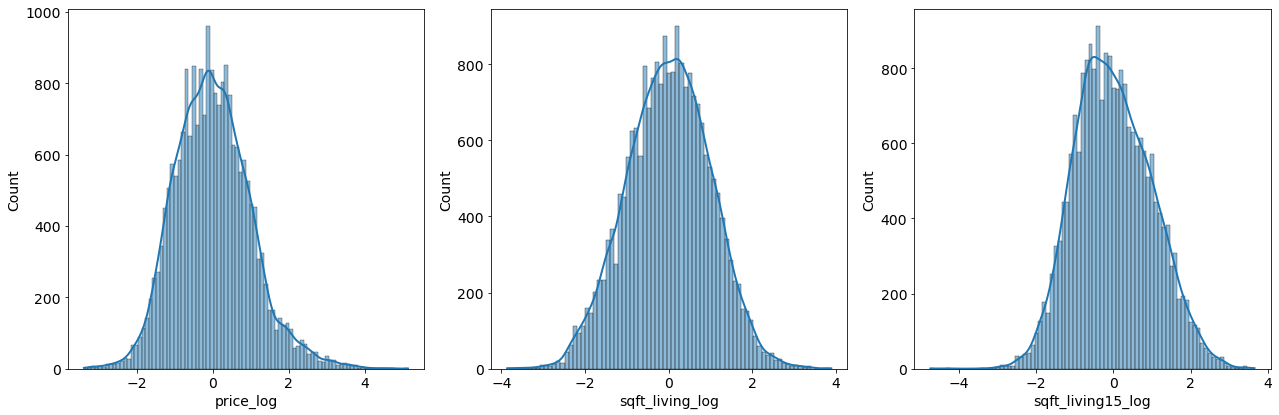

In [197]:

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(data=df1_log_norm['price_log'], kde=True, ax=axs[0])
axs[0].set_xlabel('price_log')

sns.histplot(data=df1_log_norm['sqft_living_log'], kde=True, ax=axs[1])
axs[1].set_xlabel('sqft_living_log')

sns.histplot(data=df1_log_norm['sqft_living15_log'], kde=True, ax=axs[2])
axs[2].set_xlabel('sqft_living15_log')
os.makedirs("images", exist_ok=True)

plt.tight_layout()

plt.savefig("images/dist_it2.png", bbox_inches='tight')

plt.show()

I have verified lineraity assumption of each numerical variable

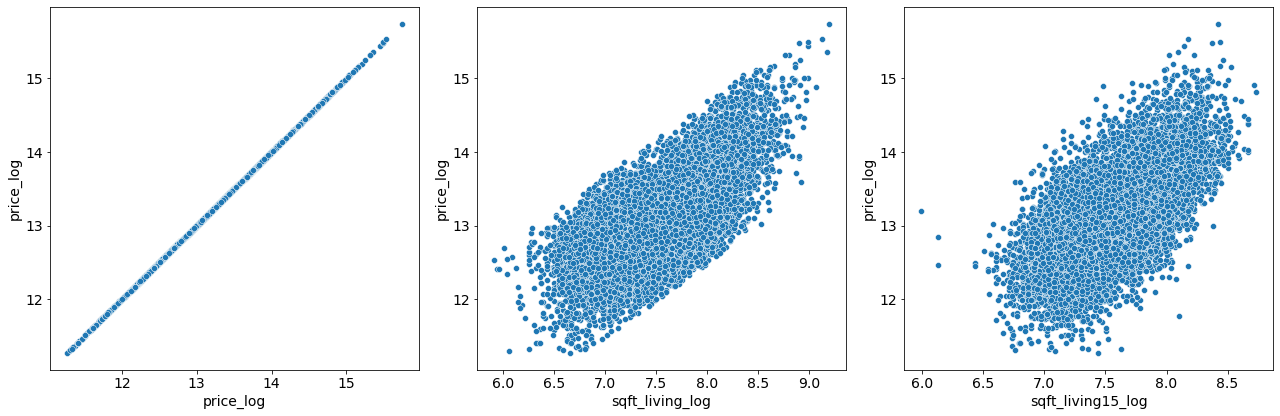

In [198]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(data=df1_log, x='price_log', y='price_log', ax=axs[0])
axs[0].set_xlabel('price_log')
axs[0].set_ylabel('price_log')

sns.scatterplot(data=df1_log, x='sqft_living_log', y='price_log', ax=axs[1])
axs[1].set_xlabel('sqft_living_log')
axs[1].set_ylabel('price_log')

sns.scatterplot(data=df1_log, x='sqft_living15_log', y='price_log', ax=axs[2])
axs[2].set_xlabel('sqft_living15_log')
axs[2].set_ylabel('price_log')

plt.tight_layout()

plt.savefig("images/scat_lin_it2", bbox_inches='tight')

plt.show()

##### Verify the Normality and Homoscedasticity assumptions

R-Squared: 0.4541497506683647
Intercept          6.731484
sqft_living_log    0.836556
dtype: float64


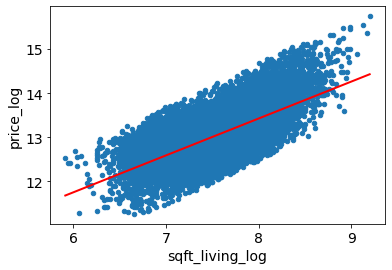

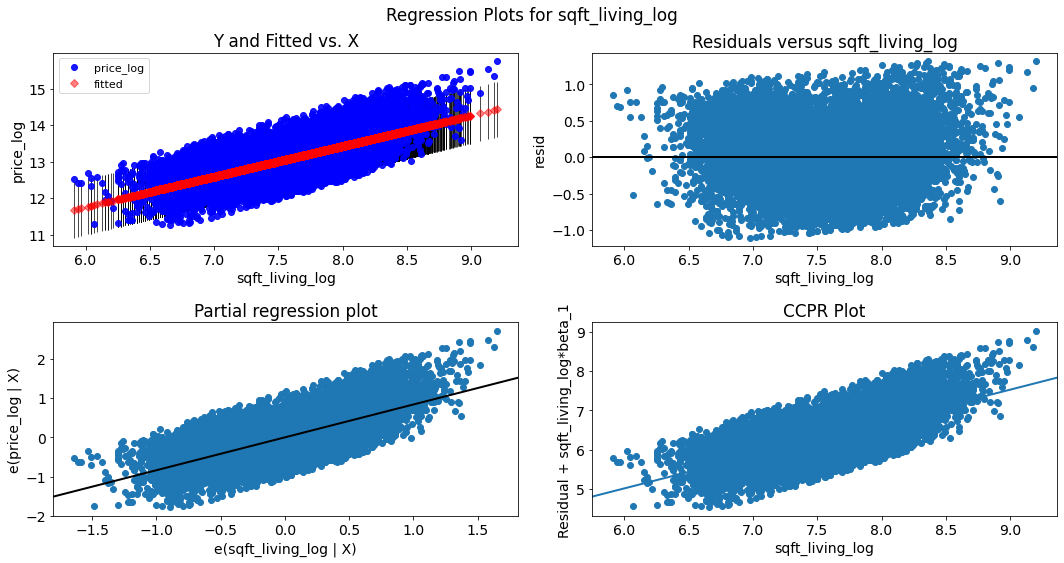

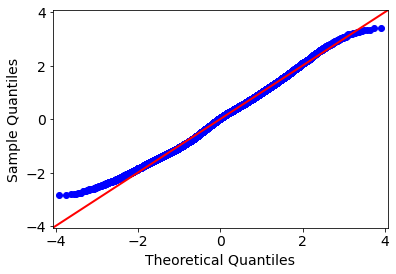

In [199]:
data=df1_log
f = 'price_log~sqft_living_log'
model = smf.ols(formula=f, data=data).fit()
print ('R-Squared:',model.rsquared)
print (model.params)

X_new = pd.DataFrame({'sqft_living_log': [data.sqft_living_log.min(), data.sqft_living_log.max()]})
preds = model.predict(X_new)

fig, ax = plt.subplots()
data.plot(kind='scatter', x='sqft_living_log', y='price_log', ax=ax)
ax.plot(X_new['sqft_living_log'], preds, c='red', linewidth=2)
plt.show()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living_log", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

plt.savefig("images/price_log_sqft_living_log_norm_homo_it2", bbox_inches='tight')

plt.show()


sqft_living's R-squared value decreased: This decline in R-squared could be attributed to the presence of outliers in the data, particularly noticeable in the Q-Q plot, where the tails exhibit curvature. These outliers may be influencing the model's performance and contributing to the reduction in R-squared.

R-Squared: 0.36826118123262597
Intercept            5.699971
sqft_living15_log    0.974571
dtype: float64


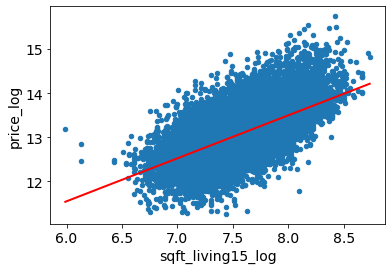

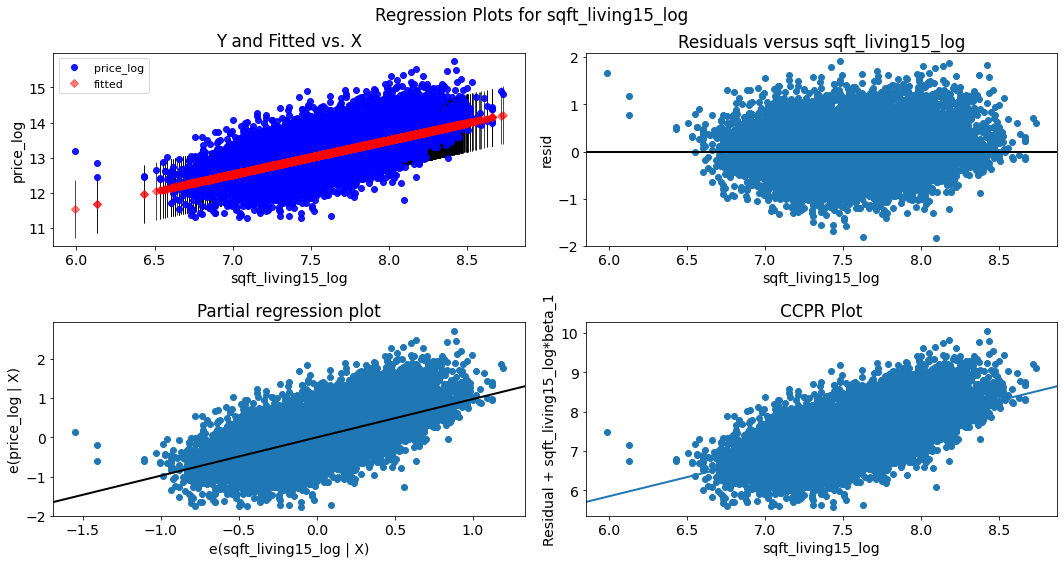

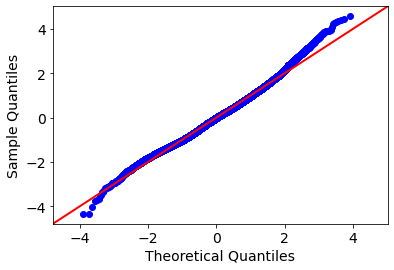

In [200]:
data=df1_log
f = 'price_log~sqft_living15_log'
model = smf.ols(formula=f, data=data).fit()
print ('R-Squared:',model.rsquared)
print (model.params)

X_new = pd.DataFrame({'sqft_living15_log': [data.sqft_living15_log.min(), data.sqft_living15_log.max()]})
preds = model.predict(X_new)

fig, ax = plt.subplots()
data.plot(kind='scatter', x='sqft_living15_log', y='price_log', ax=ax)
ax.plot(X_new['sqft_living15_log'], preds, c='red', linewidth=2)
plt.show()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living15_log", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

plt.savefig("images/price_log_sqft_living15_log_norm_homo_it2", bbox_inches='tight')

plt.show()

The sqft_living15 went up after log transformation which is expected however, like the sqft_living variable, the Q-Q plot suggests outliers are still present in the data


The log transformation of continuous variables, including price, sqft_living, and sqft_living15, has effectively addressed issues related to positive skewness, resulting in distributions that closely resemble the bell-shaped curve characteristic of normal distributions. This transformation aligns these variables more suitably with the assumptions of linear regression, making them appropriate for modeling.

### Prepartion for Iteartion 3

Earlier in correaltion analysis I idenfied bedrooms shows 0.31 correaltion to price under catagorical varirable. I want to remove it from model to see improve the model 


In [211]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np

# Define the numerical and categorical variable lists
numeric_variables1 = ['sqft_living', 'sqft_living15', 'price']
categoricalsv1 = ['grade', 'bathrooms', 'Suburb_Price_Category']

# Log transform and normalize the numerical variables from filtered_dfv1
df_cont = filtered_dfv1[numeric_variables1]

# Log transform the 'sqft_living' and 'sqft_living15' variables
log_names = ['sqft_living_log', 'sqft_living15_log']
df_cont['sqft_living_log'] = np.log(df_cont['sqft_living'])
df_cont['sqft_living15_log'] = np.log(df_cont['sqft_living15'])
df_cont.drop(['sqft_living', 'sqft_living15'], axis=1, inplace=True)

# Normalize the numerical variables (subtract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_cont = df_cont.apply(normalize)

# One-hot encode categorical variables
df_cat = pd.get_dummies(filtered_dfv1[categoricalsv1], drop_first=True)

# Concatenate the numerical and one-hot encoded categorical variables
df_baseline = pd.concat([df_cont, df_cat], axis=1)

X = df_baseline.drop('price', axis=1)
y = df_baseline['price']

# Split the data into training and testing sets (60% training, 40% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_train_int = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_int).fit()
model_summary = model.summary()

# Display the model summary
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     3255.
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:15:59   Log-Likelihood:                -12320.
No. Observations:               12949   AIC:                         2.465e+04
Df Residuals:                   12942   BIC:                         2.471e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

<ipython-input-211-831d9c678a91>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cont['sqft_living_log'] = np.log(df_cont['sqft_living'])
<ipython-input-211-831d9c678a91>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cont['sqft_living15_log'] = np.log(df_cont['sqft_living15'])
C:\Users\Sumali\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

 ### R-squared score

In [204]:
regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring="r2", cv=crossvalidation))

baseline

0.5909797677818137

Interpretation of MSE:
The R-squared score measures the proportion of the variance in the target variable 

Value: In this case, an R-squared score of approximately 0.591 means that the linear regression model can explain approximately 59.1% of the variance in the 'price' variable using the features in X.



#### Interactions

In [207]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
final = X.copy()

final_model = np.mean(
    cross_val_score(regression, final, y, scoring="r2", cv=crossvalidation)
)

print("Baseline Model:" )
print(baseline)
print("Baseline Model plus interaction:" )
print(final_model)

Baseline Model:
0.5909797677818137
Baseline Model plus interaction:
0.5909797677818137


In [208]:
# Adding interaction to the model

df_inter_sm = sm.add_constant(final)
model = sm.OLS(y, final)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.582
Model:                            OLS   Adj. R-squared (uncentered):              0.582
Method:                 Least Squares   F-statistic:                              5016.
Date:                Sat, 23 Sep 2023   Prob (F-statistic):                        0.00
Time:                        19:14:39   Log-Likelihood:                         -21200.
No. Observations:               21583   AIC:                                  4.241e+04
Df Residuals:                   21577   BIC:                                  4.246e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
sqft_living_log                  0.3094      0.008     39.509      0.000       0.294       0.325
sqft_living15_log                0.0303      0.007      4.386      0.000       0.017       0.044
grade                            0.2026      0.003     61.937      0.000       0.196       0.209
bathrooms                        0.0260      0.009      2.872      0.004       0.008       0.044
Suburb_Price_Category_Low       -1.7502      0.019    -93.175      0.000      -1.787      -1.713
Suburb_Price_Category_Medium    -1.2421      0.022    -56.401      0.000      -1.285      -1.199
==============================================================================
Omnibus:                    18560.558   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1352350.145
Skew:                           3.757   Prob(JB):                         0.00
Kurtosis:                      41.044   Cond. No.                         50.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adding the interaction did not increase the adjusted R-squared value. Since the model did not improve, it is most likely at its best fit and is ready for model validation.

<ipython-input-217-8f5c04ceb076>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cont['sqft_living_log'] = np.log(df_cont['sqft_living'])
<ipython-input-217-8f5c04ceb076>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cont['sqft_living15_log'] = np.log(df_cont['sqft_living15'])
C:\Users\Sumali\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

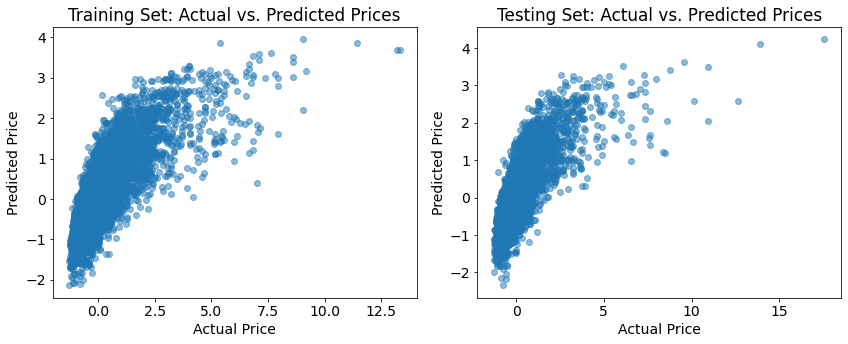

In [217]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np

# Define the numerical and categorical variable lists
numeric_variables1 = ['sqft_living', 'sqft_living15', 'price']
categoricalsv1 = ['grade', 'bathrooms', 'Suburb_Price_Category']

# Log transform and normalize the numerical variables from filtered_dfv1
df_cont = filtered_dfv1[numeric_variables1]

# Log transform the 'sqft_living' and 'sqft_living15' variables
log_names = ['sqft_living_log', 'sqft_living15_log']
df_cont['sqft_living_log'] = np.log(df_cont['sqft_living'])
df_cont['sqft_living15_log'] = np.log(df_cont['sqft_living15'])
df_cont.drop(['sqft_living', 'sqft_living15'], axis=1, inplace=True)

# Normalize the numerical variables (subtract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_cont = df_cont.apply(normalize)

# One-hot encode categorical variables
df_cat = pd.get_dummies(filtered_dfv1[categoricalsv1], drop_first=True)

# Concatenate the numerical and one-hot encoded categorical variables
df_baseline = pd.concat([df_cont, df_cat], axis=1)

X = df_baseline.drop('price', axis=1)
y = df_baseline['price']

# Split the data into training and testing sets (60% training, 40% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_train_int = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_int).fit()
model_summary = model.summary()

# Reset the indices of y_train and X_train_int
y_train = y_train.reset_index(drop=True)
X_train_int = X_train_int.reset_index(drop=True)

# Fit the model on the training data
model = sm.OLS(y_train, X_train_int).fit()

# Predict prices on both training and testing data
y_train_pred = model.predict(X_train_int)
X_test_int = sm.add_constant(X_test)
y_test_pred = model.predict(X_test_int)

# Create scatterplots for the training and testing sets
plt.figure(figsize=(12, 5))

# Scatterplot for the training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Training Set: Actual vs. Predicted Prices")

# Scatterplot for the testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Testing Set: Actual vs. Predicted Prices")

plt.tight_layout()
plt.show()


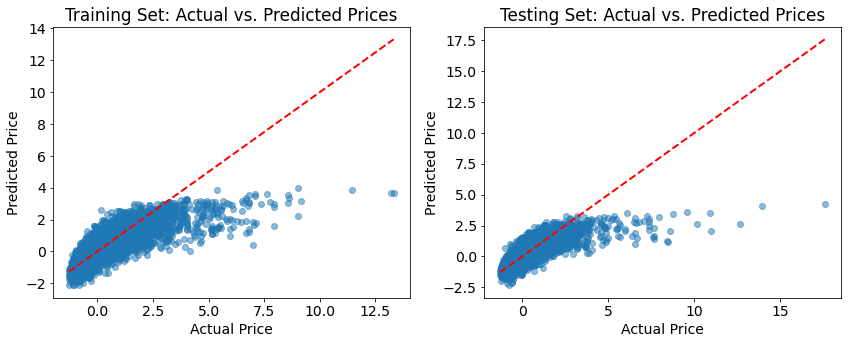

In [218]:
import matplotlib.pyplot as plt

# Fit the model on the training data
model = sm.OLS(y_train, X_train_int).fit()

# Predict prices on both training and testing data
y_train_pred = model.predict(X_train_int)
X_test_int = sm.add_constant(X_test)
y_test_pred = model.predict(X_test_int)

# Create scatterplots for the training and testing sets
plt.figure(figsize=(12, 5))

# Scatterplot for the training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Training Set: Actual vs. Predicted Prices")

# Scatterplot for the testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Testing Set: Actual vs. Predicted Prices")

plt.tight_layout()
plt.show()


## Evaluation



In [220]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error (MSE) for training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate Mean Absolute Error (MAE) for training set
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate Mean Squared Error (MSE) for testing set
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate Mean Absolute Error (MAE) for testing set
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Training Set MSE: {mse_train:.2f}")
print(f"Training Set MAE: {mae_train:.2f}")
print(f"Testing Set MSE: {mse_test:.2f}")
print(f"Testing Set MAE: {mae_test:.2f}")


Training Set MSE: 0.39
Training Set MAE: 0.41
Testing Set MSE: 0.43
Testing Set MAE: 0.42


The provided training and testing set Mean Squared Error (MSE) and Mean Absolute Error (MAE) values are common metrics used to evaluate the performance of a regression model. Here's what you can infer from these results:

Training Set MSE: 0.39 - This metric represents the average squared difference between the actual prices in your training dataset and the predicted prices from model. A lower MSE indicates that your model is better at fitting the training data. An MSE of 0.39 suggests that, on average, model's predictions are reasonably close to the actual prices in the training set.

Training Set MAE: 0.41 - The Mean Absolute Error is another measure of the model's accuracy. It represents the average absolute difference between the actual and predicted values. Like MSE, a lower MAE indicates better model performance. An MAE of 0.41 indicates that, on average, model's predictions are within 0.41 units of the actual prices in the training set.

In summary,  model seems to have performed well on both the training and testing sets. The MSE and MAE values are relatively close between the two sets, which indicates that  model is generalizing reasonably well to unseen data. 

## 6 conclusion 

Significant Variables: The model indicates that several variables significantly influence housing prices and rental market dynamics.

Model Reliability: With an R-squared value of 0.601, the model explains approximately 60.1% of the variance in housing prices. This suggests that the model has a moderate level of predictive power.

Key Predictors: The variables "sqft_living_log," "grade," "bathrooms," "Suburb_Price_Category_Low," and "Suburb_Price_Category_Medium" have statistically significant coefficients, implying they are crucial factors in determining prices and rental market conditions.

Property Size Matters: The logarithmically transformed square footage of living space (sqft_living_log) plays a substantial role in pricing. As this variable increases, house prices tend to rise.

Grade Quality: The "grade" of a property is a significant driver of housing prices. Higher-grade properties command higher prices, as indicated by the positive coefficient.

Bathroom Count: The number of bathrooms (bathrooms) also impacts prices positively. Properties with more bathrooms tend to be priced higher.

Suburb Price Categories: The model identifies two suburb price categories, "Low" and "Medium," as influential variables. Living in a suburb categorized as "Low" or "Medium" tends to result in lower property prices compared to other categories.